# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Content</p></div>     
   
- Libraries
- Configurations
- **Exploratory Data Analysis** 
    - Hypothesis
    - Mind Map Business
    - Summary Table
    - Bivariate Analysis
        - About Cancelations
            - Cancelations by Hotel
            - Cancelations by Month
            - Cancelations by Lead Time
            - Cancelations by Country
            - Cancelations by Market Segment
            - Cancelations by Agency
            - Cancelations by Company
            - Cancelations by Deposit Type
        - About ADR

## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Libraries</p></div>

In [66]:
#!pip install sort-dataframeby-monthorweek
#!pip install sorted-months-weekdays
#!pip install calplot

In [67]:
# Basic Tools
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Visualization Tools
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from PIL import Image
from IPython.display import display

#Ordering by Month instead of alphabetical order
import sort_dataframeby_monthorweek as sd


# Convert Alpha3 Countries to Country Name and Continents
import pycountry
import pycountry_convert as pc

# File/ OS Tools
import os
import sys
import dotenv

In [68]:
dotenv.load_dotenv(dotenv.find_dotenv())
ROOT_DIR = os.getenv('ROOT_DIR')
data = pd.read_csv(f'{ROOT_DIR}/data/data_processed/hotel_bookings_processed.csv')

In [69]:
data.shape

(119234, 37)

In [70]:
def plot_settings():  
    
    #plt.style.use('seaborn-whitegrid')
    # Set Matplotlib defaults
    plt.rc('figure', figsize=(16,8))
    #plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
    plt.rc('animation', html='html5')
    plt.rc('axes',titlesize=14)
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
    
    #%config InlineBackend.figure_format='retina'
    sns.set(style='whitegrid', font_scale=1.2)#palette='muted', 
    #HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
    #sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
    
plot_settings()

In [71]:
#Ordering by Month instead of alphabetical order
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [72]:
def summary_stats(df):
    numerical_features = df.select_dtypes(include = 'number').columns.values
    df = df[numerical_features]
    
    count_ = pd.DataFrame(df.apply(np.size))
    #pct_ = pd.DataFrame(df.apply(np.size)/len(data_raw)*100)
    pct_ = pd.DataFrame(df.apply(np.size)/len(data)*100)
    sum_ = pd.DataFrame(df.apply(np.sum))
    mean_ = pd.DataFrame(df.apply(np.mean))
    std_ = pd.DataFrame(df.apply(np.std))
    median_ = pd.DataFrame(df.apply(np.median))
    
    min_ = pd.DataFrame(df.apply(min))
    max_ = pd.DataFrame(df.apply(max))
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    q1_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,25)))
    q3_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,75)))
    
    #skewness_= pd.DataFrame(df.apply(lambda x: x.skew()))
    #kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis()))
    
    summary = pd.concat([count_, pct_, mean_, std_, median_, sum_, min_, max_, range_, q1_,q3_],axis=1)
    summary.columns = ['counts', 'pct_raw','mean','std','median','sum','min','max', 'range', '25%','75%']
 

    cm = sns.light_palette("#2D7DAB", as_cmap = True)
    
    display(summary.style.format('{:.2f}').background_gradient(subset=(summary.index[3:],summary.columns[:]),cmap=cm))

# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Exploratory Data Analysis</p></div> 

In exploratory data analysis we must analyze as much as we can, literally doing detective work. However, our objective specifically in this project is about cancellation, so the analysis will be focused on that.

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Hypothesis</p></div> 

**Hypothesis about cancellations**

Some hypotheses were raised in meetings previously scheduled by the business team and data scientists, among the most interesting are:

- H1: The difference between cancellation rate of urban and resort hotels is greater than 5%.
- H2: The cancellations rate during low season is higher than high season.
- H3: People with lead time of more than 10 days cancel more than people with lead time of less than 10 days.
- H4: People who requires at least one special requests cancel less.
- H5: People who have a previous cancellation history cancel more.
- H6: The difference in cancellations rate between the top 10 agencies with the most bookings is less than 10%.
- H7: The avarage days stay for resort hotel is around a week and City hotel around 2 days.
- H8: The adr at the Resort Hotel is higher than at the City Hotel throughout the year

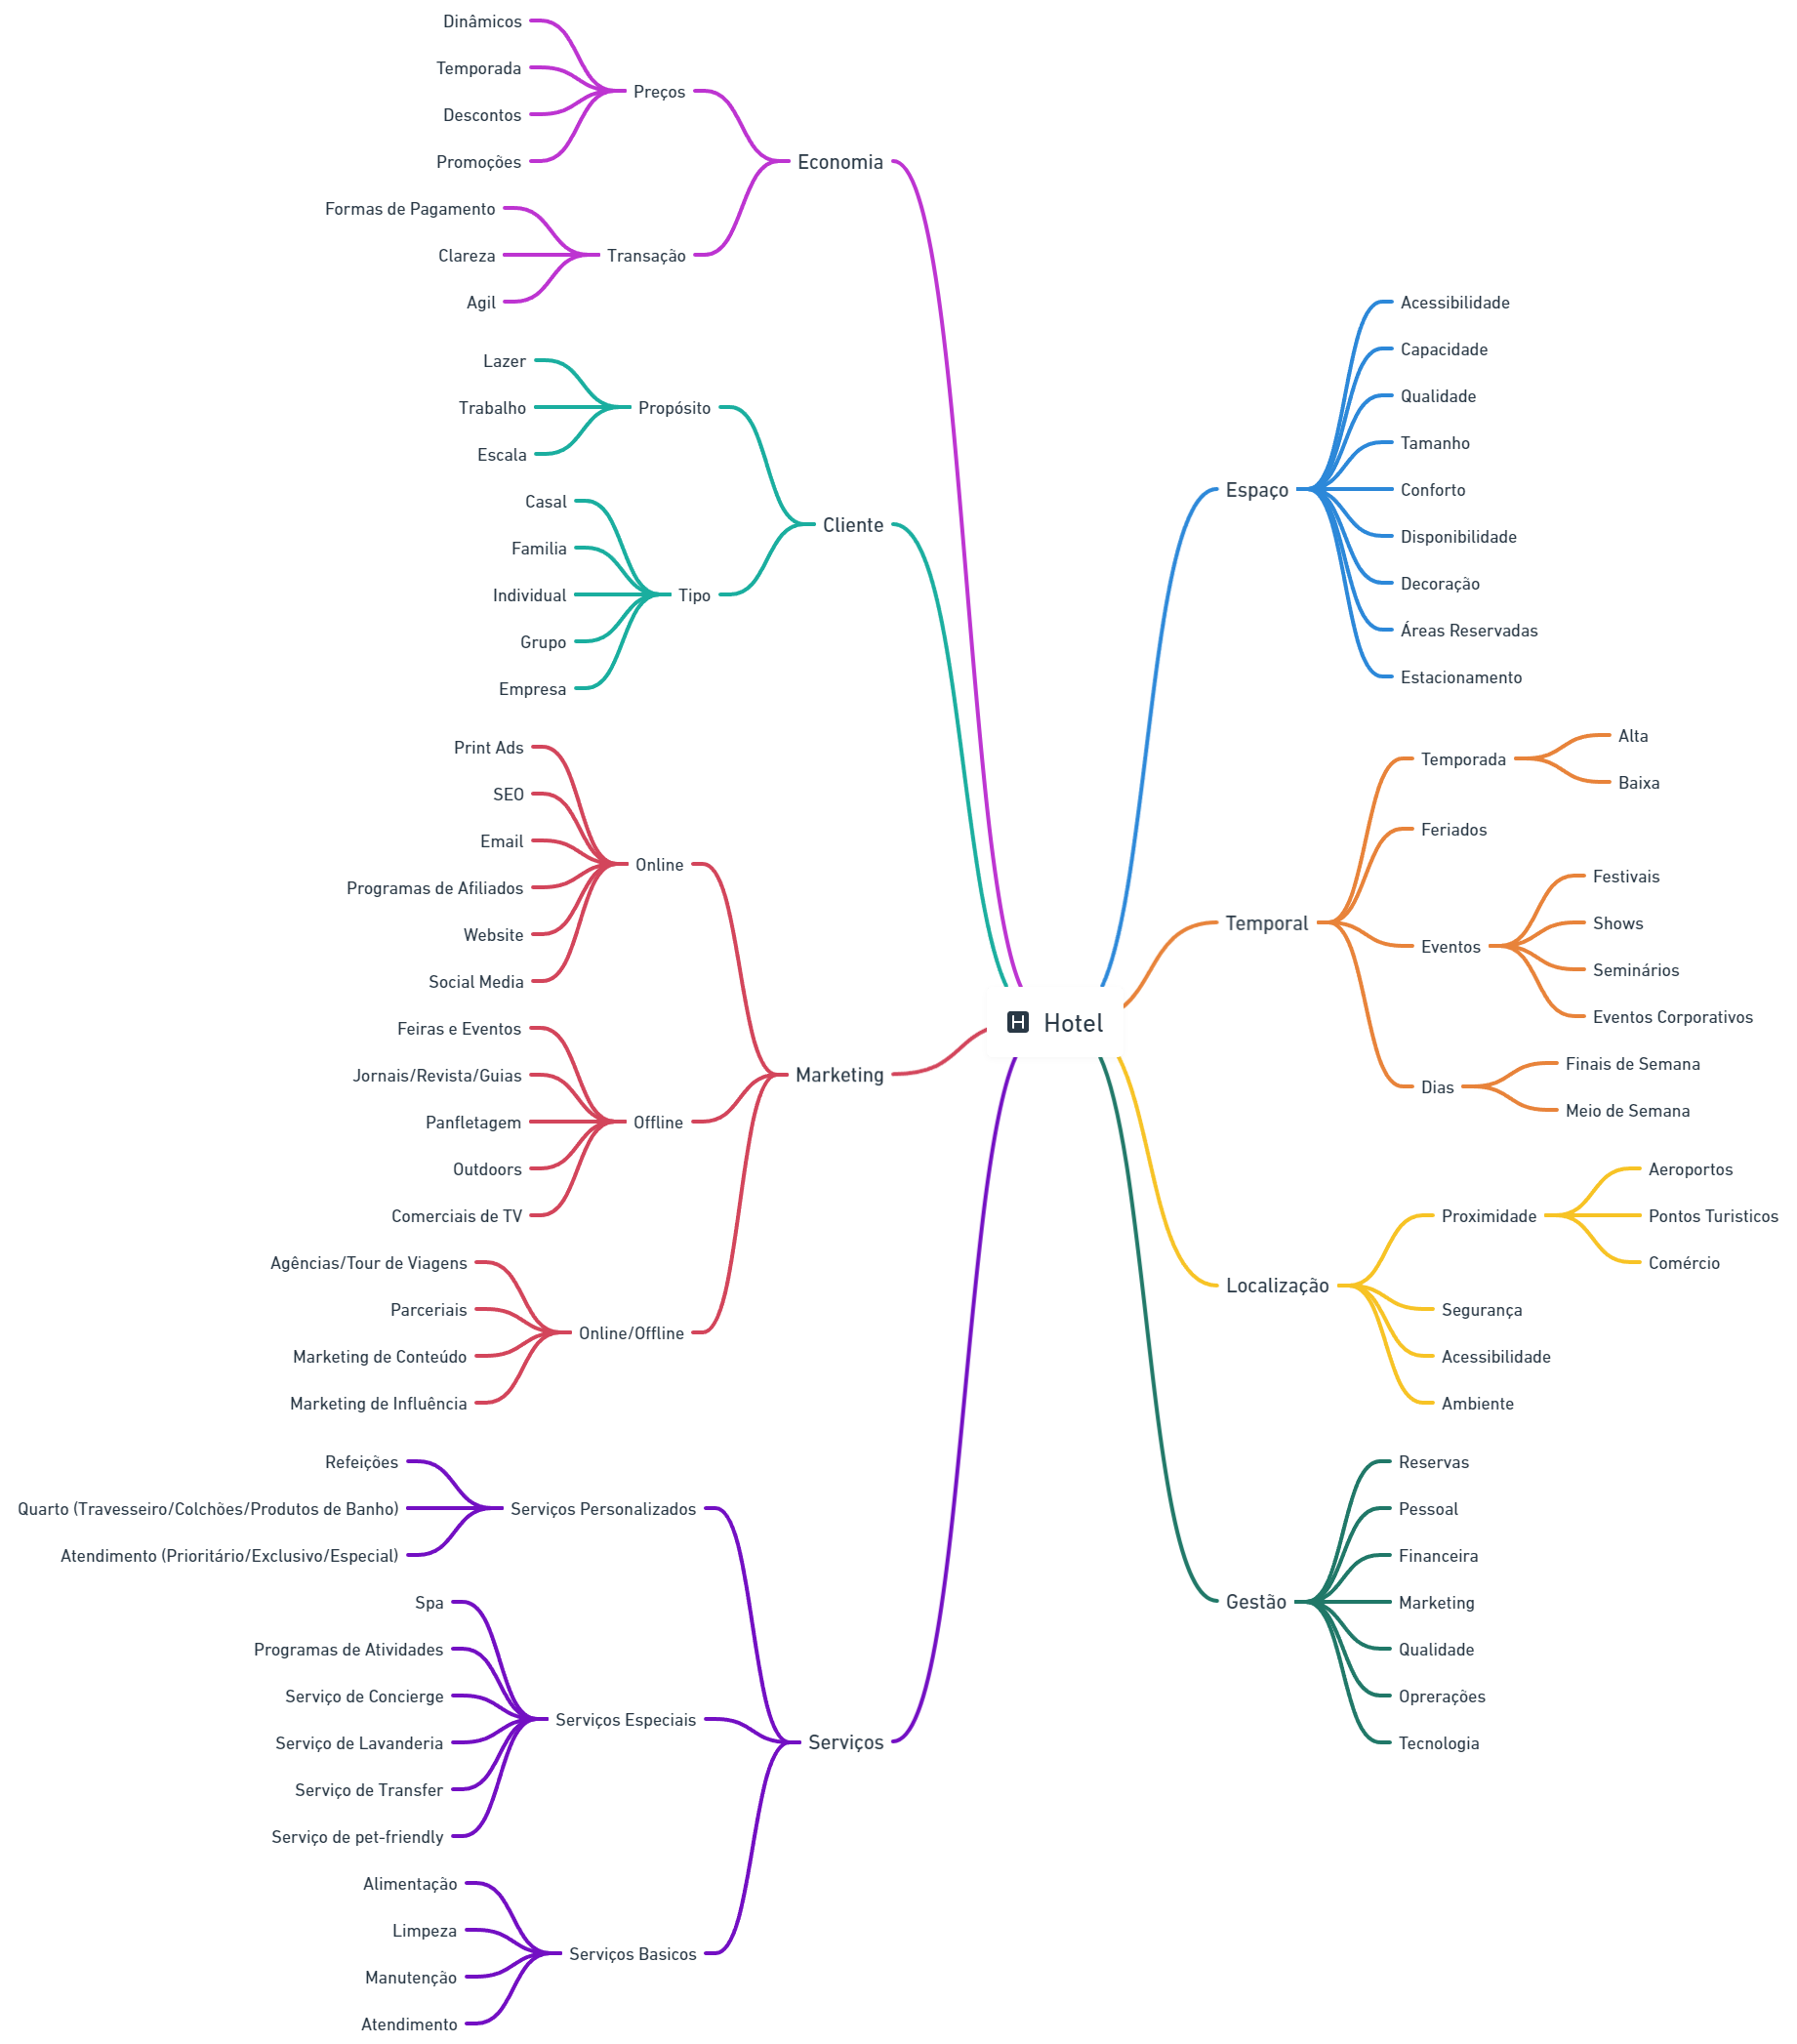

In [73]:
img = Image.open(f'{ROOT_DIR}/images/mind_map.png')
img

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Summary Table</p></div>

In [74]:
rh = data.loc[(data["hotel"] == "Resort Hotel")]
ch = data.loc[(data["hotel"] == "City Hotel")]

In [75]:
summary_stats(data)

,counts,pct_raw,mean,std,median,sum,min,max,range,25%,75%
is_canceled,119234.00,100.00,0.37,0.48,0.00,44224.00,0.00,1.00,1.00,0.00,1.00
lead_time,119234.00,100.00,104.10,106.88,69.00,12412632.00,0.00,737.00,737.00,18.00,161.00
arrival_date_year,119234.00,100.00,2016.16,0.71,2016.00,240394406.00,2015.00,2017.00,2.00,2016.00,2017.00
arrival_date_week_number,119234.00,100.00,27.16,13.60,28.00,3238774.00,1.00,53.00,52.00,16.00,38.00
arrival_date_day_of_month,119234.00,100.00,15.80,8.78,16.00,1883638.00,1.00,31.00,30.00,8.00,23.00
stays_in_weekend_nights,119234.00,100.00,0.93,1.00,1.00,110530.00,0.00,19.00,19.00,0.00,2.00
stays_in_week_nights,119234.00,100.00,2.50,1.90,2.00,297969.00,0.00,50.00,50.00,1.00,3.00
adults,119234.00,100.00,1.86,0.58,2.00,221634.00,0.00,55.00,55.00,2.00,2.00
children,119234.00,100.00,0.10,0.40,0.00,12403.00,0.00,10.00,10.00,0.00,0.00
babies,119234.00,100.00,0.01,0.10,0.00,949.00,0.00,10.00,10.00,0.00,0.00


In [76]:
data.describe(include="object").T

,count,unique,top,freq
hotel,119234,2,City Hotel,79186
arrival_date_month,119234,12,August,13863
meal,119234,4,BB,92239
country,119234,178,PRT,48496
market_segment,119234,8,Online TA,56412
distribution_channel,119234,5,TA/TO,97766
reserved_room_type,119234,10,A,85877
assigned_room_type,119234,12,A,74025
deposit_type,119234,3,No Deposit,104485
customer_type,119234,4,Transient,89496


**Check**
- negative adr? adr lower than zero?adr equal to 5400?
- zero people?
- reservations with 10 babies/children
- Waiting list of 391 dias?

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">About Cancelations</p></div>

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Hotel</p></div>

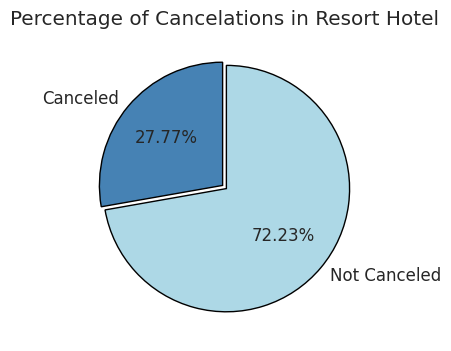

In [77]:
plt.figure(figsize=(4,4))
plt.title('Percentage of Cancelations in Resort Hotel');
plt.pie([len(data.loc[(data.is_canceled == 1) & (data.hotel == 'Resort Hotel')]),
         len(data.loc[(data.is_canceled == 0) & (data.hotel == 'Resort Hotel')])],  
               
        labels = ['Canceled', 'Not Canceled'],
        colors=['#4682B4','#ADD8E6'],
        explode = (0.02, 0.02),
        startangle=90,
        autopct='%.2f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 12});

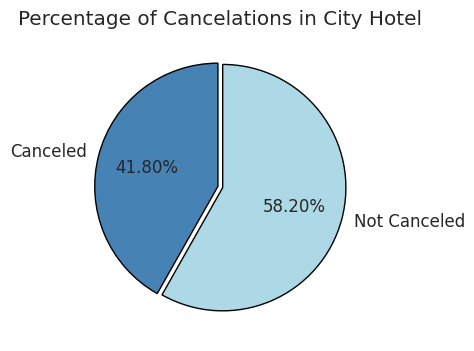

In [78]:
plt.figure(figsize=(4,4))
plt.title('Percentage of Cancelations in City Hotel');
plt.pie([len(data.loc[(data.is_canceled == 1) & (data.hotel == 'City Hotel')]),
         len(data.loc[(data.is_canceled == 0) & (data.hotel == 'City Hotel')])],  
               
        labels = ['Canceled', 'Not Canceled'],
        colors=['#4682B4','#ADD8E6'],
        explode = (0.02, 0.02),
        startangle=90,
        autopct='%.2f%%',
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 12});

**H1:** True, the cancellation rate of the City Hotel is 14% higher than the Resort Hotel.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Month</p></div>

In [79]:
# monthly_cancelations.style.background_gradient(cmap='Blues')

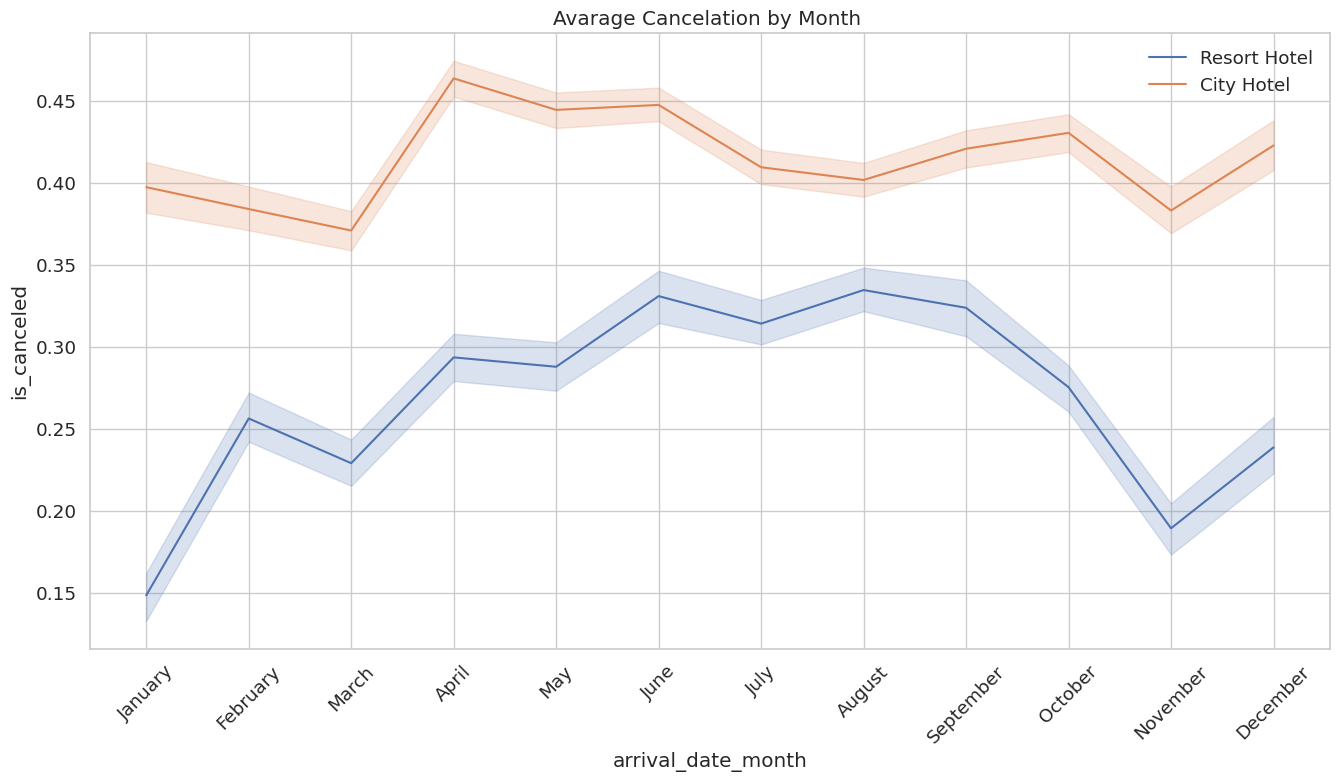

In [83]:
data=sort_month(data, 'arrival_date_month')
sns.lineplot(data=data, x="arrival_date_month", y="is_canceled", hue="hotel")
plt.title("Avarage Cancelation by Month ")
plt.xticks(rotation=45)
plt.legend(ncol=1, loc="best", frameon=False);

**Obs:** 2015 e 2017 have less records...

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Season</p></div>

In [87]:
monthly_cancelations = data.groupby(['arrival_date_month','hotel']).agg( reservations = ('hotel', 'size'),
                                                                         #adr_mean = ('adr', 'mean'),                            
                                                                         canceled_mean = ('is_canceled', 'mean')).reset_index()

monthly_cancelations = sort_month(monthly_cancelations, 'arrival_date_month')

In [90]:
#High Season( June, July, August) no Resort e City Hotel
print('Avarage cancelations during high season - City Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='City Hotel') & ((monthly_cancelations['arrival_date_month']=='June') | (monthly_cancelations['arrival_date_month']=='July') | (monthly_cancelations['arrival_date_month']=='August'))].mean())
print('Avarage cancelations during high season - Resort Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='Resort Hotel') & ((monthly_cancelations['arrival_date_month']=='June') | (monthly_cancelations['arrival_date_month']=='July') | (monthly_cancelations['arrival_date_month']=='August'))].mean())

Avarage cancelations during high season - City Hotel: 0.4194472317004136
Avarage cancelations during high season - Resort Hotel: 0.3264409959482948


In [91]:
#Low Season( Novembro, Janeiro, Fevereiro, Março) no Resort e City Hotel
print('Avarage cancelations during low season - City Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='City Hotel') & ((monthly_cancelations['arrival_date_month']=='November') | (monthly_cancelations['arrival_date_month']=='January') | (monthly_cancelations['arrival_date_month']=='February') | (monthly_cancelations['arrival_date_month']=='March'))].mean())
print('Avarage cancelations during low season - Resort Hotel:', monthly_cancelations.canceled_mean.loc[(monthly_cancelations['hotel']=='Resort Hotel') & ((monthly_cancelations['arrival_date_month']=='November') | (monthly_cancelations['arrival_date_month']=='January') | (monthly_cancelations['arrival_date_month']=='February') | (monthly_cancelations['arrival_date_month']=='March'))].mean())

Avarage cancelations during low season - City Hotel: 0.38371656061118026
Avarage cancelations during low season - Resort Hotel: 0.2056763308892052


**H2:** False, considering that the European high season refers to the months of June, July, August and the low season to the months of November, January, February and March; on average the rate of cancellations increased in both hotels

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Lead Time</p></div>

In [92]:
lead_cancel=data.groupby(['lead_time','hotel']).agg( reservations = ('lead_time', 'size'),
                                                     canceled_mean = ('is_canceled', 'mean')).reset_index()

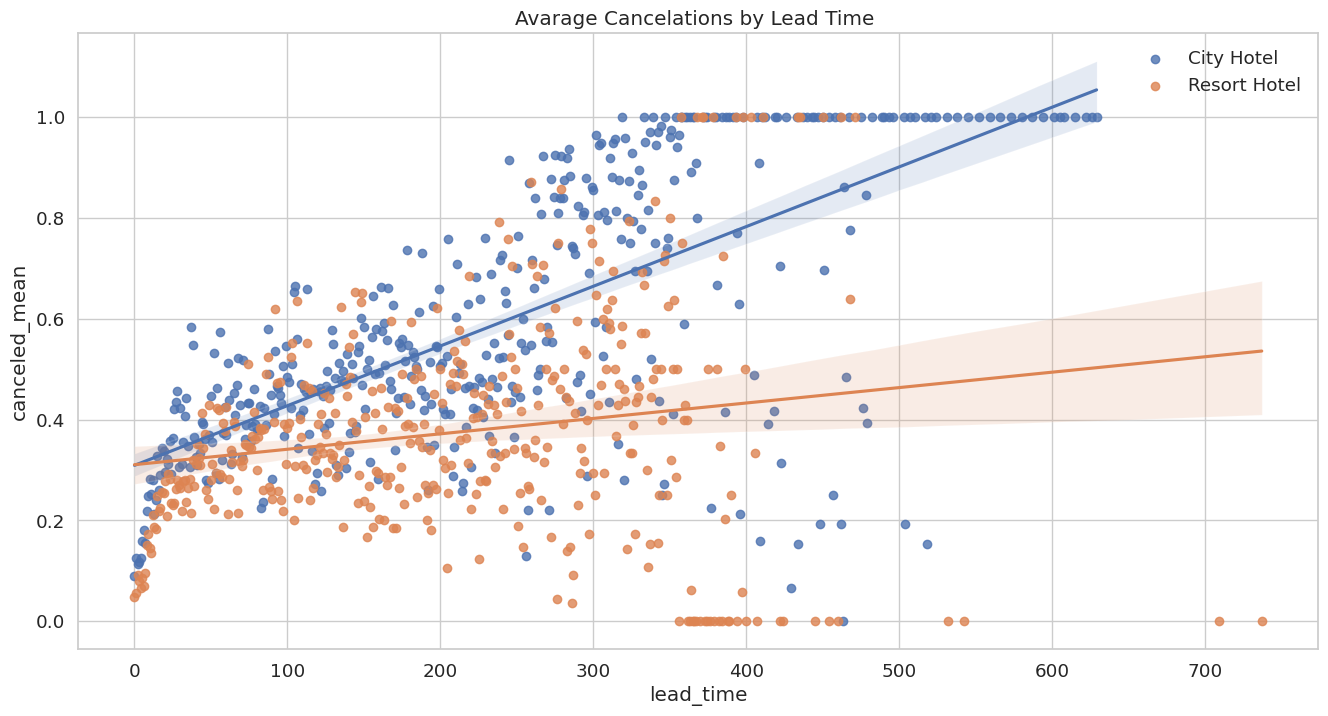

In [94]:
plt.title("Avarage Cancelations by Lead Time ")
sns.regplot(data=lead_cancel.loc[lead_cancel.hotel=='City Hotel'], x='lead_time', y='canceled_mean', label='City Hotel')
sns.regplot(data=lead_cancel.loc[lead_cancel.hotel=='Resort Hotel'], x='lead_time', y='canceled_mean', label='Resort Hotel')
plt.legend(ncol=1, loc="upper right", frameon=False);

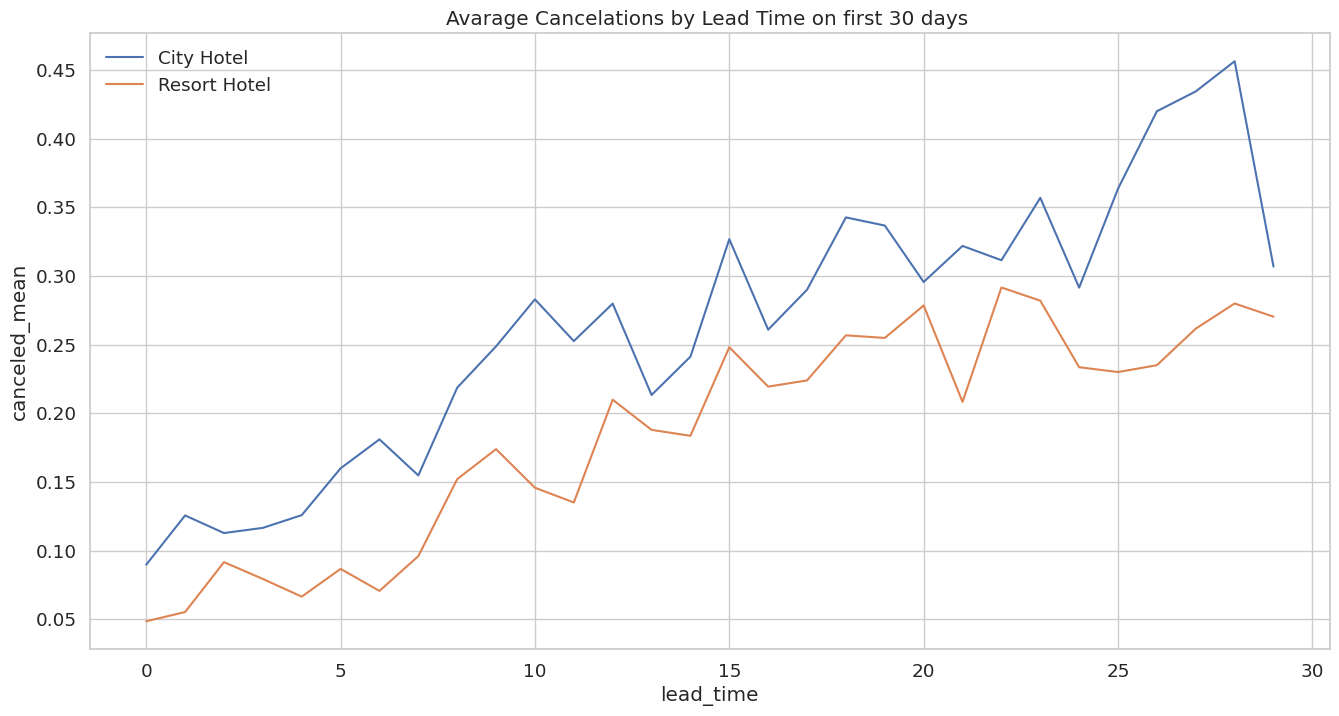

In [95]:
plt.title("Avarage Cancelations by Lead Time on first 30 days ")
sns.lineplot(data=lead_cancel.head(60), x="lead_time", y="canceled_mean", hue="hotel");
plt.legend(ncol=1, loc="best", frameon=False);

In [120]:
mean_lead_rh=rh.lead_time.loc[(rh.is_canceled == 0)].mean()
meanc_lead_rh=rh.lead_time.loc[(rh.is_canceled == 1)].mean()
mean_lead_ch=ch.lead_time.loc[(ch.is_canceled == 0)].mean()
meanc_lead_ch=ch.lead_time.loc[(ch.is_canceled == 1)].mean()
#mean_lead_rh, meanc_lead_rh,mean_lead_ch,meanc_lead_ch

(78.84702343912052, 128.68054306779356, 80.85472181234267, 150.28122167844845)

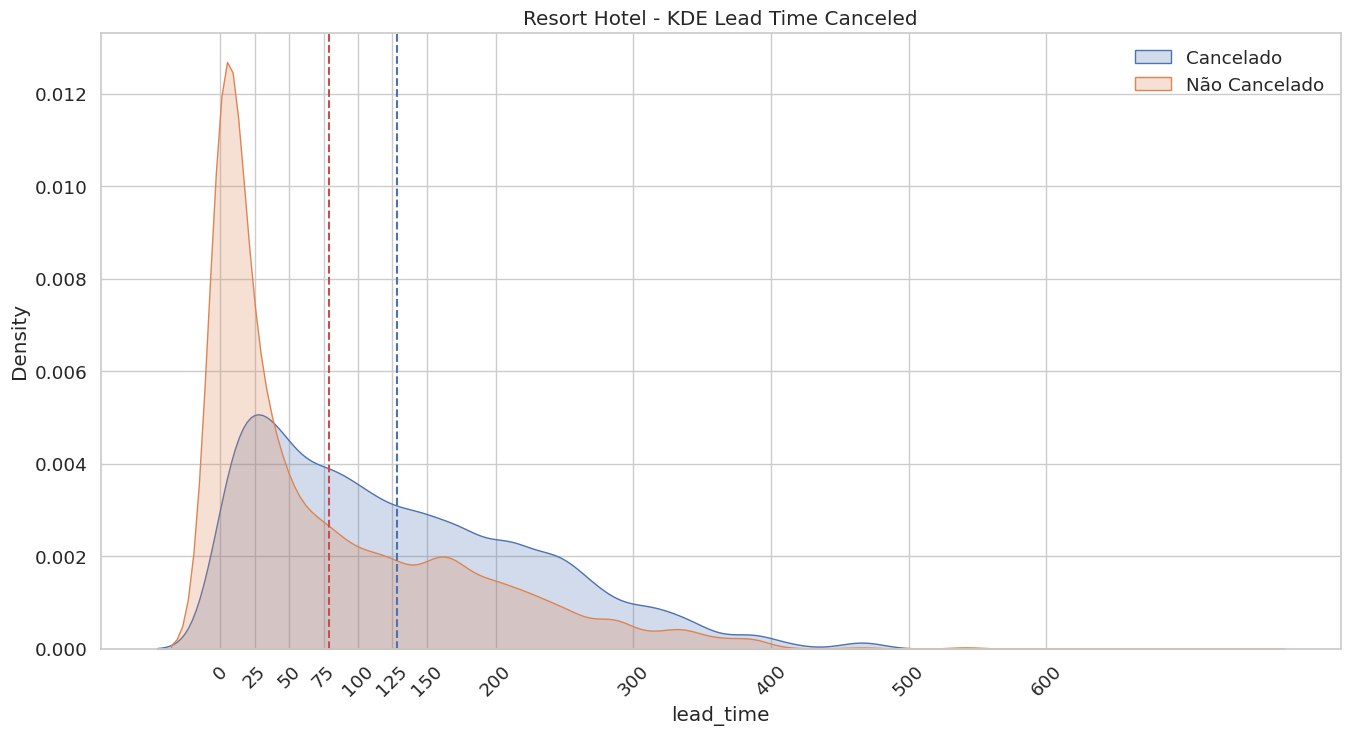

In [117]:
plt.title('Resort Hotel - KDE Lead Time Canceled')
sns.kdeplot(data=rh.loc[(rh.is_canceled == 1)], x='lead_time', fill=True, label='Cancelado')#, 
sns.kdeplot(data=rh.loc[(rh.is_canceled == 0)], x='lead_time', fill=True, label='Não Cancelado')#,
plt.axvline(x=mean_lead_rh, color='r', linestyle='--')
plt.axvline(x=meanc_lead_rh, color='b', linestyle='--')
plt.xticks([0,25,50,75,100, 125,150,200,300,400,500,600], rotation=45)
#plt.xlim(0,600)
plt.legend(ncol=1, loc="upper right", frameon=False);

In [97]:
print('Avarage Cancelations below 10 days of Lead Time on City Hotel:', ch.is_canceled.loc[(ch.lead_time <= 10)].mean())
print('Avarage Cancelations above 10 days of Lead Time on City Hotel:', ch.is_canceled.loc[(ch.lead_time > 10)].mean())

Avarage Cancelations below 10 days of Lead Time on City Hotel: 0.14225974435852928
Avarage Cancelations above 10 days of Lead Time on City Hotel: 0.47057673803223476


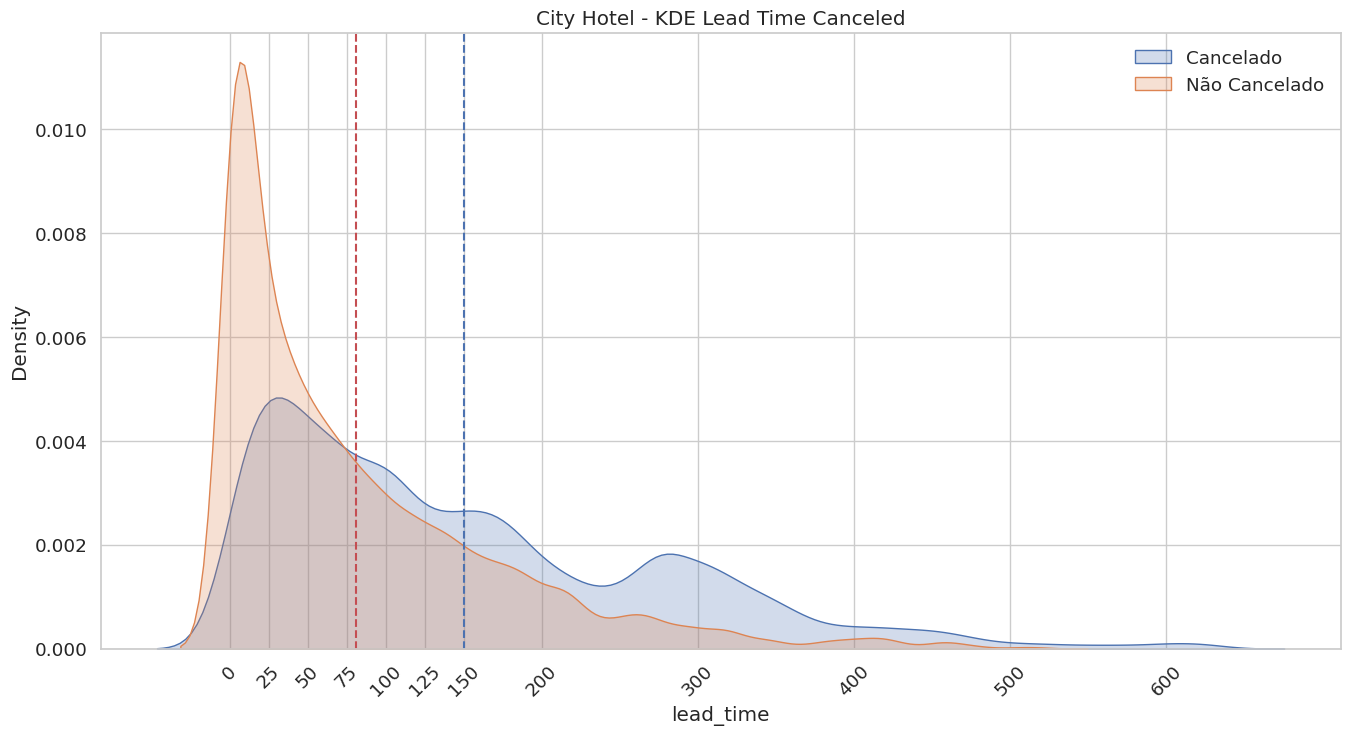

In [119]:
plt.title('City Hotel - KDE Lead Time Canceled')
sns.kdeplot(data=ch.loc[(ch.is_canceled == 1)], x='lead_time', fill=True, label='Cancelado') 
sns.kdeplot(data=ch.loc[(ch.is_canceled == 0)], x='lead_time', fill=True, label='Não Cancelado')
plt.axvline(x=mean_lead_ch, color='r', linestyle='--')
plt.axvline(x=meanc_lead_ch, color='b', linestyle='--')
plt.xticks([0,25,50,75,100, 125,150,200,300,400,500,600], rotation=45)
plt.legend(ncol=1, loc="upper right", frameon=False);

In [122]:
print('Avarage Cancelations below 10 days of Lead Time on Resort Hotel:', rh.is_canceled.loc[(rh.lead_time <= 10)].mean())
print('Avarage Cancelations above 10 days of Lead Time on Resort Hotel:', rh.is_canceled.loc[(rh.lead_time > 10)].mean())

Avarage Cancelations below 10 days of Lead Time on Resort Hotel: 0.07568693581985914
Avarage Cancelations above 10 days of Lead Time on Resort Hotel: 0.3456802482731004


**H3:** True, the average cancellation rate for a lead time of less than or equal to 10 days is 7.57% in the resort hotel and 14.22% in the urban hotel, less than 34.56% and 47.06%, which are the respective rates average cancellation rates for lead times greater than 10 days.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Country</p></div>

In [149]:
print('Number of unique Country: ', data.country.nunique()-1)
print('Number of unique Country on Resort Hotel: ', rh.country.nunique()-1)
print('Number of unique Country on City Hotel:', ch.country.nunique()-1)

Number of unique Country:  177
Number of unique Country on Resort Hotel:  125
Number of unique Country on City Hotel: 166


In [150]:
country_cancel=data.groupby(['country','hotel']).agg( reservations = ('country', 'size'),
                                         canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations', ascending=False).reset_index()


country_cancel.head(10)#.style.background_gradient(cmap='Blues')

,country,hotel,reservations,canceled_mean
0,PRT,City Hotel,30874,0.650418
1,PRT,Resort Hotel,17622,0.422086
2,FRA,City Hotel,8792,0.195974
3,GBR,Resort Hotel,6812,0.130799
4,DEU,City Hotel,6082,0.176258
5,GBR,City Hotel,5308,0.294273
6,ESP,City Hotel,4604,0.288010
7,ESP,Resort Hotel,3956,0.215116
8,ITA,City Hotel,3302,0.379467
9,IRL,Resort Hotel,2166,0.199446


In [125]:
#Top 10 Paises que mais cancelam reservas no City Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='City Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=False).head(10)

,country,hotel,reservations,canceled_mean
0,PRT,City Hotel,30874,0.650418
36,AGO,City Hotel,338,0.585799
19,CHN,City Hotel,865,0.523699
41,TUR,City Hotel,225,0.422222
53,KOR,City Hotel,124,0.419355
67,ZAF,City Hotel,62,0.419355
11,BRA,City Hotel,1792,0.406808
31,RUS,City Hotel,441,0.403628
43,LUX,City Hotel,206,0.402913
46,MAR,City Hotel,184,0.396739


In [126]:
#Top 10 Paises que menos cancelam reservas no City Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='City Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=True).head(10)

,country,hotel,reservations,canceled_mean
57,SRB,City Hotel,94,0.031915
74,ISL,City Hotel,51,0.078431
69,NZL,City Hotel,60,0.100000
62,MEX,City Hotel,79,0.126582
45,JPN,City Hotel,188,0.148936
65,BGR,City Hotel,70,0.171429
58,DZA,City Hotel,91,0.175824
4,DEU,City Hotel,6082,0.176258
40,FIN,City Hotel,295,0.179661
18,AUT,City Hotel,1053,0.186135


In [73]:
#Top 10 Paises que mais cancelam reservas no Resort Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='Resort Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=False).head(10)

,country,hotel,reservations,canceled_mean
64,MAR,Resort Hotel,75,0.480000
1,PRT,Resort Hotel,17622,0.422086
61,LUX,Resort Hotel,80,0.325000
44,RUS,Resort Hotel,189,0.322751
32,CHE,Resort Hotel,435,0.257471
39,SWE,Resort Hotel,304,0.240132
33,BRA,Resort Hotel,430,0.234884
7,ESP,Resort Hotel,3956,0.215116
9,IRL,Resort Hotel,2166,0.199446
54,NOR,Resort Hotel,123,0.186992


In [74]:
#Top 10 Paises que menos cancelam reservas no Resort Hotel( min 50 reservas)
country_cancel.loc[(country_cancel['hotel']=='Resort Hotel') & (country_cancel['reservations']>50)].sort_values(by='canceled_mean', ascending=True).head(10)

,country,hotel,reservations,canceled_mean
52,CHN,Resort Hotel,134,0.067164
66,DNK,Resort Hotel,65,0.076923
28,Unknow,Resort Hotel,464,0.096983
50,FIN,Resort Hotel,151,0.105960
25,NLD,Resort Hotel,514,0.108949
37,POL,Resort Hotel,333,0.117117
17,DEU,Resort Hotel,1203,0.121363
3,GBR,Resort Hotel,6812,0.130799
13,FRA,Resort Hotel,1610,0.131056
30,BEL,Resort Hotel,448,0.131696


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelation by previous cancelations</p></div>

In [128]:
previous_cancel=data.groupby(['previous_cancellations','hotel']).agg( reservations = ('previous_cancellations', 'size'),
                                                                      canceled_mean = ('is_canceled', 'mean')).reset_index()

previous_cancel.head(12)

,previous_cancellations,hotel,reservations,canceled_mean
0,0,City Hotel,73800,0.380542
1,0,Resort Hotel,38953,0.261803
2,1,City Hotel,5154,0.963135
3,1,Resort Hotel,896,0.837054
4,2,City Hotel,70,0.185714
5,2,Resort Hotel,44,0.568182
6,3,City Hotel,51,0.137255
7,3,Resort Hotel,14,0.928571
8,4,City Hotel,25,0.160000
9,4,Resort Hotel,6,0.500000


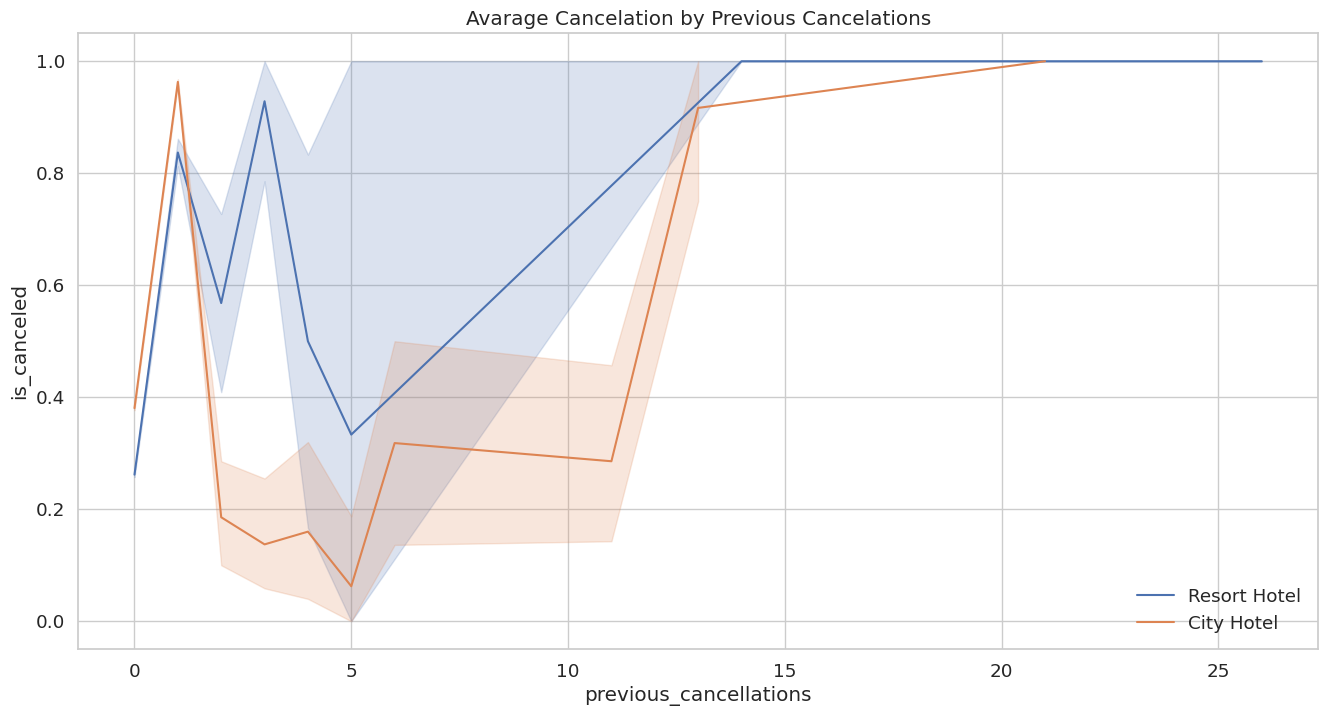

In [132]:
sns.lineplot(data=data, x="previous_cancellations", y='is_canceled', hue="hotel")
plt.title("Avarage Cancelation by Previous Cancelations")
plt.legend(ncol=1, loc="lower right", frameon=False);

In [57]:
print('Taxa de Cancelamento médio City Hotel de quem não possui registro de cancelamento anterior',ch.is_canceled.loc[(ch.previous_cancellations == 0)].mean())
print('Taxa de Cancelamento médio City Hotel de quem possui ao menos um registro de cancelamento anterior',ch.is_canceled.loc[(ch.previous_cancellations > 0)].mean())

print('Taxa de Cancelamento médio Resort Hotel de quem não possui registro de cancelamento anterior',rh.is_canceled.loc[(rh.previous_cancellations == 0)].mean())
print('Taxa de Cancelamento médio Resort Hotel de quem possui ao menos um registro de cancelamento anterior',rh.is_canceled.loc[(rh.previous_cancellations > 0)].mean())

Taxa de Cancelamento médio City Hotel de quem não possui registro de cancelamento anterior 0.3805420054200542
Taxa de Cancelamento médio City Hotel de quem possui ao menos um registro de cancelamento anterior 0.9316747122168585
Taxa de Cancelamento médio Resort Hotel de quem não possui registro de cancelamento anterior 0.26180268528739764
Taxa de Cancelamento médio Resort Hotel de quem possui ao menos um registro de cancelamento anterior 0.8438356164383561


**H5:** True, the average cancellation rate for those who do not have a previous cancellation record at City and Resort Hotel is 38.05% and 26.18%. Those who have at least one cancellation record are 93.16% and 84.38% respectively.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Special Request</p></div>

In [137]:
especial_cancel=data.groupby(['total_of_special_requests','hotel']).agg( reservations = ('total_of_special_requests', 'size'),
                                                                         canceled_mean = ('is_canceled', 'mean')).reset_index()

especial_cancel

,total_of_special_requests,hotel,reservations,canceled_mean
0,0,City Hotel,47873,0.550206
1,0,Resort Hotel,22349,0.322878
2,1,City Hotel,21379,0.220824
3,1,Resort Hotel,11806,0.219973
4,2,City Hotel,8125,0.214031
5,2,Resort Hotel,4827,0.233478
6,3,City Hotel,1585,0.176656
7,3,Resort Hotel,910,0.182418
8,4,City Hotel,198,0.106061
9,4,Resort Hotel,142,0.105634


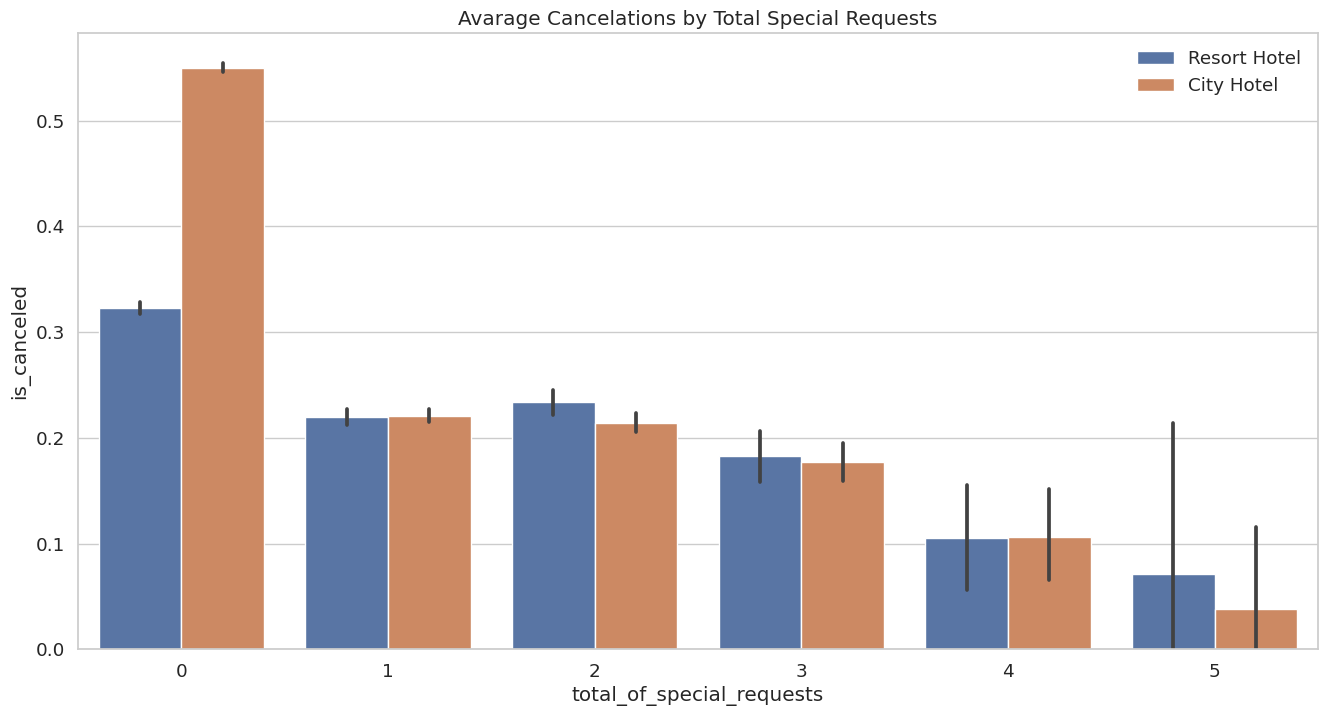

In [138]:
sns.barplot(data=data, x="total_of_special_requests", y="is_canceled", hue="hotel")
plt.title("Avarage Cancelations by Total Special Requests")
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.show()

In [139]:
print('Taxa de Cancelamento médio City Hotel sem requisições especiais',ch.is_canceled.loc[(ch.total_of_special_requests == 0)].mean())
print('Taxa de Cancelamento médio City Hotel com pelo menos uma requisição especial',ch.is_canceled.loc[(ch.total_of_special_requests > 0)].mean())

print('Taxa de Cancelamento médio Resort Hotel sem requisições especiais',rh.is_canceled.loc[(rh.total_of_special_requests == 0)].mean())
print('Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição especial',rh.is_canceled.loc[(rh.total_of_special_requests > 0)].mean())

Taxa de Cancelamento médio City Hotel sem requisições especiais 0.5502057527207402
Taxa de Cancelamento médio City Hotel com pelo menos uma requisição especial 0.2159486475265864
Taxa de Cancelamento médio Resort Hotel sem requisições especiais 0.32287798111772337
Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição especial 0.22069043448782416


**H4** True, the average cancellation rate for those who do not make any special requests at City and Resort Hotel is 55.02% and 32.29% and those who make at least one special request are 21.59% and 22.07% respectively.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by car parking required</p></div>

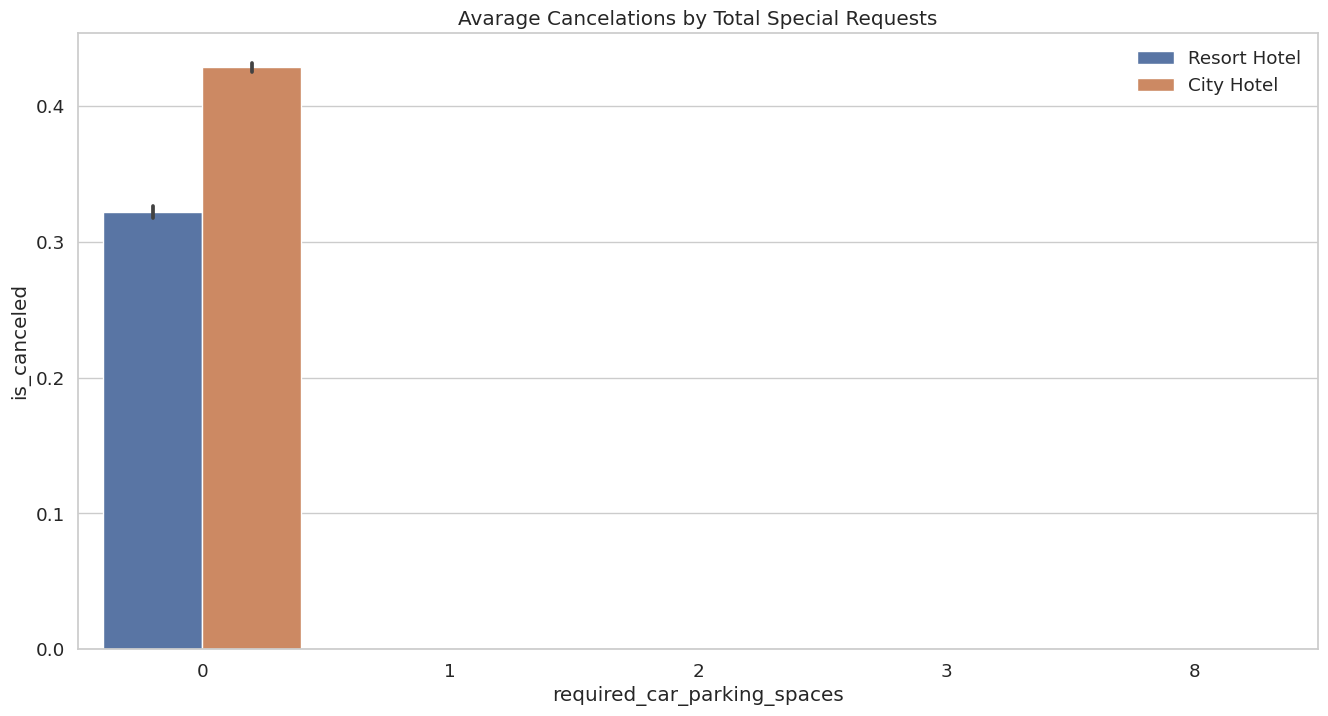

In [142]:
sns.barplot(data=data, x="required_car_parking_spaces", y="is_canceled", hue="hotel")
plt.title("Avarage Cancelations by Total Special Requests")
plt.legend(ncol=1, loc="upper right", frameon=False);

In [143]:
print('Taxa de Cancelamento médio City Hotel sem requisição de estacionamento',ch.is_canceled.loc[(ch.required_car_parking_spaces == 0)].mean())
print('Taxa de Cancelamento médio City Hotel com pelo menos uma requisição de vaga de estacionamento',ch.is_canceled.loc[(ch.required_car_parking_spaces > 0)].mean())

print('Taxa de Cancelamento médio Resort Hotel sem requisição de estacionamento',rh.is_canceled.loc[(rh.required_car_parking_spaces == 0)].mean())
print('Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição de vaga de estacionamento',rh.is_canceled.loc[(rh.required_car_parking_spaces > 0)].mean())

Taxa de Cancelamento médio City Hotel sem requisição de estacionamento 0.42841612093288123
Taxa de Cancelamento médio City Hotel com pelo menos uma requisição de vaga de estacionamento 0.0
Taxa de Cancelamento médio Resort Hotel sem requisição de estacionamento 0.3218264417373188
Taxa de Cancelamento médio Resort Hotel com pelo menos uma requisição de vaga de estacionamento 0.0


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelamentos por Quarto</p></div>

In [144]:
previous_cancel=data.groupby(['reserved_room_type','hotel']).agg( reservations = ('reserved_room_type', 'size'),
                                                                      canceled_mean = ('is_canceled', 'mean')).reset_index()
previous_cancel

,reserved_room_type,hotel,reservations,canceled_mean
0,A,City Hotel,62489,0.436045
1,A,Resort Hotel,23388,0.272875
2,B,City Hotel,1113,0.330638
3,B,Resort Hotel,3,0.000000
4,C,City Hotel,13,0.384615
5,C,Resort Hotel,918,0.330065
6,D,City Hotel,11748,0.352996
7,D,Resort Hotel,7432,0.263052
8,E,City Hotel,1543,0.327285
9,E,Resort Hotel,4982,0.282818


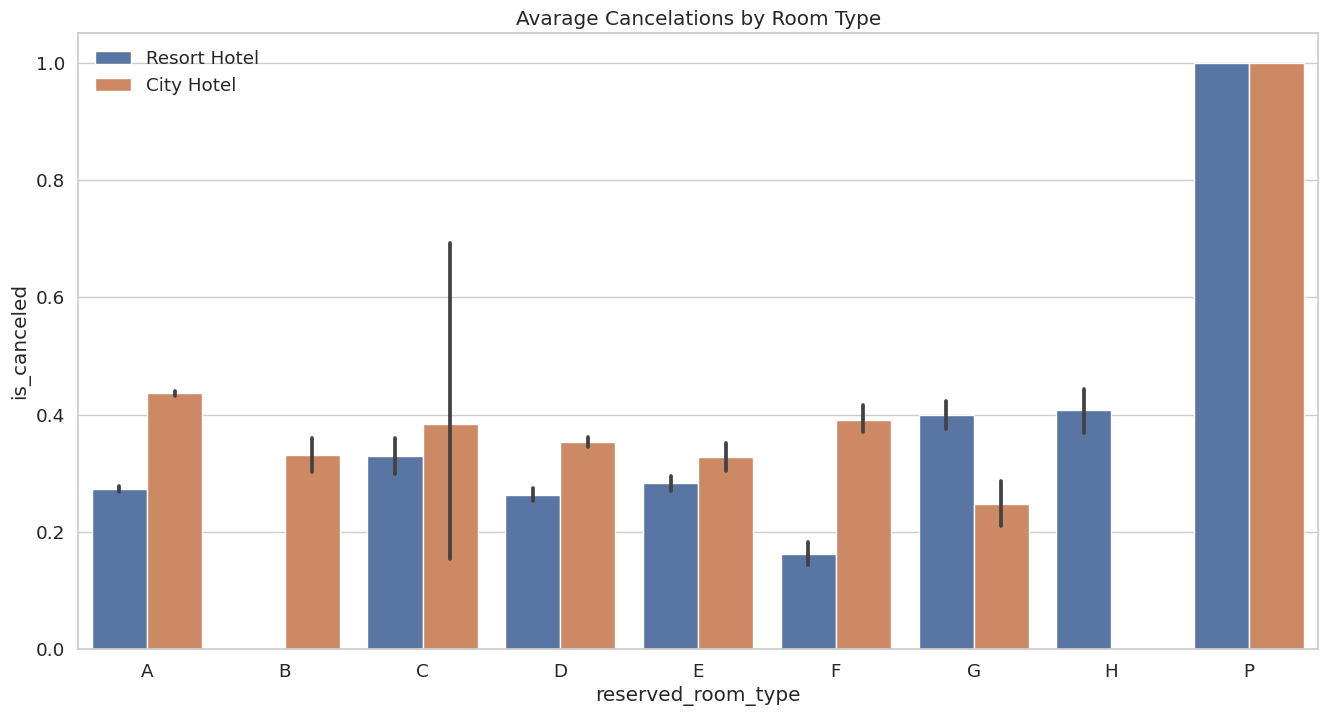

In [145]:
sns.barplot(data=data, x="reserved_room_type", y="is_canceled", hue="hotel", order=['A','B','C','D','E','F','G','H','P'])
plt.title("Avarage Cancelations by Room Type")
plt.legend(ncol=1, loc="upper left", frameon=False);

In [169]:
#data.loc[data['reserved_room_type']=='P']

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Agency</p></div>

In [146]:
print('Number of unique agencies: ',data.agent.nunique()-1)

Number of unique agencies:  333


In [151]:
agent_cancel=data.groupby(['agent','hotel']).agg( reservations = ('agent', 'size'),
                                                  adr_mean = ('adr', 'mean'),
                                                  canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

agent_cancel.head(10)

,agent,hotel,reservations,adr_mean,canceled_mean
0,9,City Hotel,31918,122.670578,0.415502
1,240,Resort Hotel,13905,116.112275,0.394319
2,0,Resort Hotel,8202,75.695218,0.173250
3,0,City Hotel,8093,93.384526,0.322377
4,1,City Hotel,7134,71.408342,0.733109
5,14,City Hotel,3633,125.727418,0.179466
6,7,City Hotel,3532,95.912610,0.134202
7,250,Resort Hotel,2869,132.623580,0.178808
8,6,City Hotel,2683,99.158919,0.360045
9,241,Resort Hotel,1721,100.392156,0.137130


In [152]:
n = 11
top_rh_agents = rh['agent'].value_counts().nlargest(n).index
top_ch_agents = ch['agent'].value_counts().nlargest(n).index

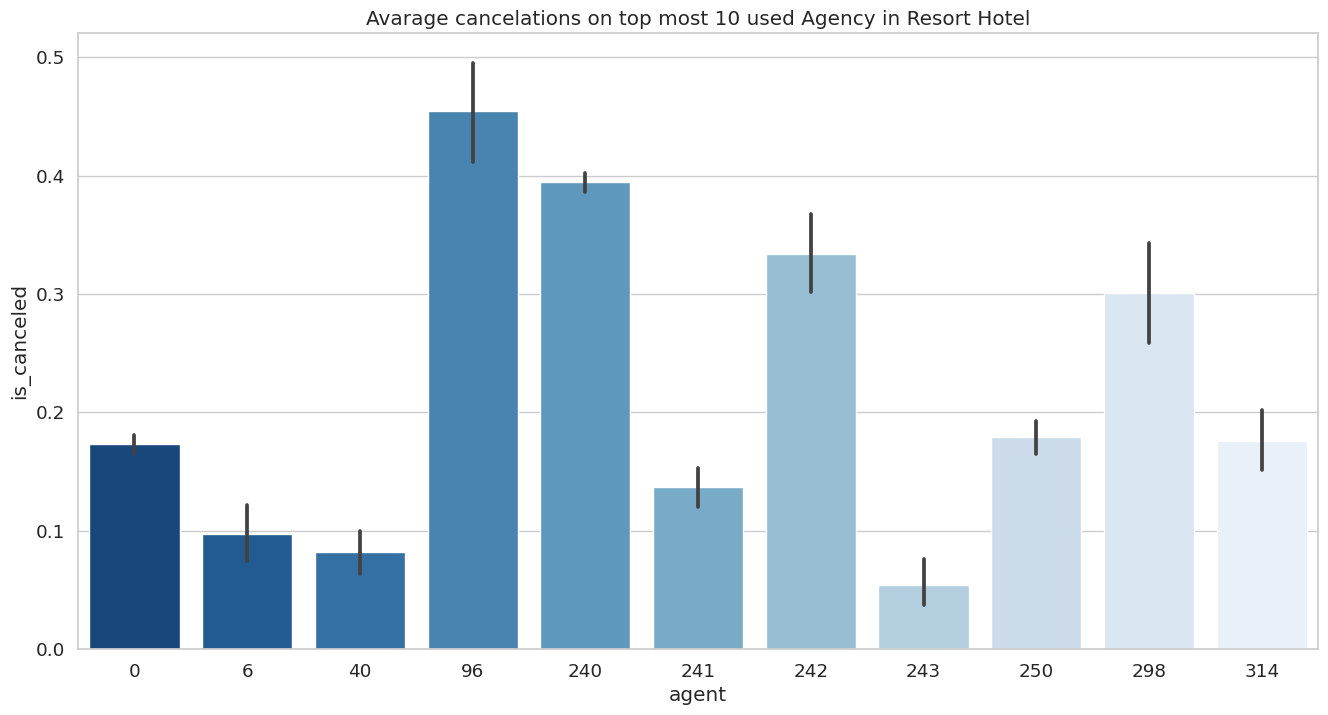

In [153]:
plt.title("Avarage cancelations on top most 10 used Agency in Resort Hotel")
sns.barplot(data=rh.loc[rh['agent'].isin(top_rh_agents)], x="agent", y="is_canceled", palette='Blues_r');

In [154]:
print('Minimo:',agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='Resort Hotel') & (agent_cancel['agent']!=0)].head(10).min())
print('Maximo:',agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='Resort Hotel') & (agent_cancel['agent']!=0)].head(10).max())

Minimo: 0.054474708171206226
Maximo: 0.4543761638733706


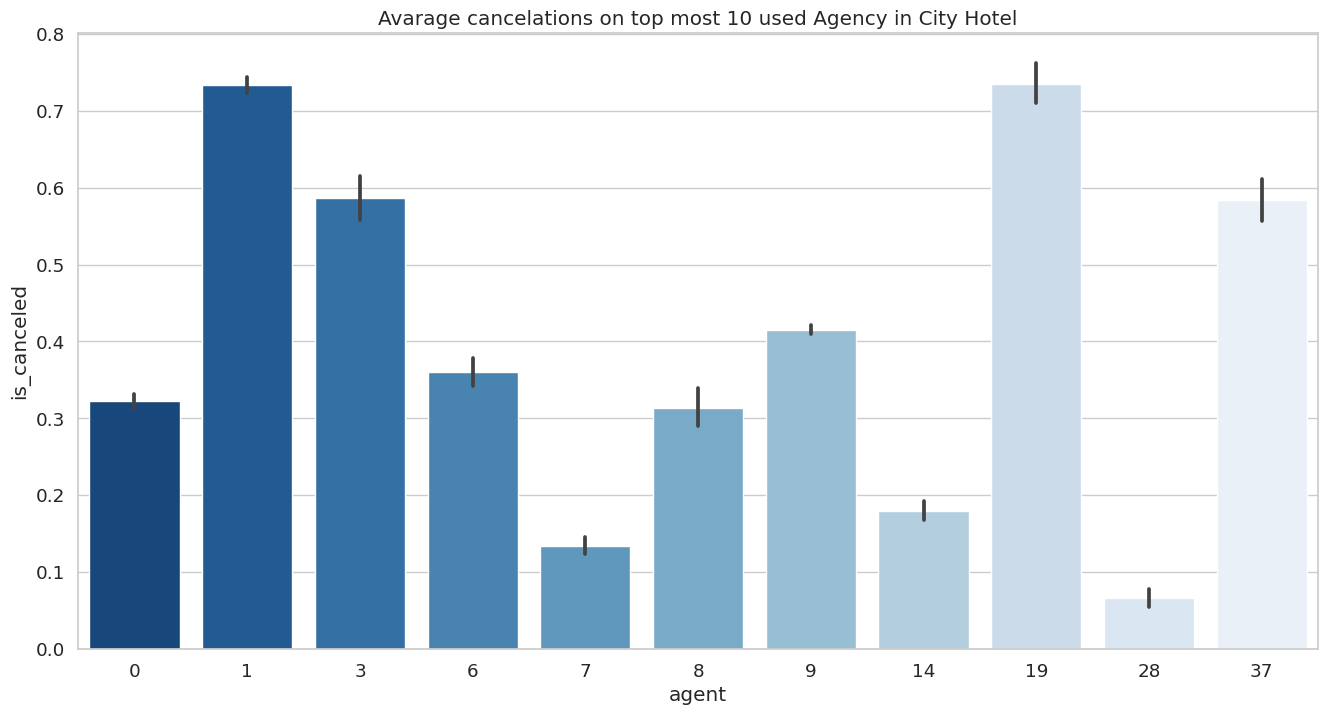

In [155]:
plt.title("Avarage cancelations on top most 10 used Agency in City Hotel")
sns.barplot(data=ch.loc[ch['agent'].isin(top_ch_agents)], x="agent", y="is_canceled", palette='Blues_r');

In [156]:
print('Minimo:', agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='City Hotel') & (agent_cancel['agent']!=0)].head(10).min())
print('Maximo:', agent_cancel.canceled_mean.loc[(agent_cancel['hotel']=='City Hotel') & (agent_cancel['agent']!=0)].head(10).max())

Minimo: 0.0663850331925166
Maximo: 0.7351555136663525


In [157]:
x = data.loc[(data['agent']!=0)]
x.market_segment.value_counts()

Online TA        56071
Offline TA/TO    23802
Groups           15648
Direct            6592
Corporate          700
Complementary      101
Aviation            25
Name: market_segment, dtype: int64

**OBS:** Agency 0 means: no agency or undefined agency

**H6:** False, the difference in the average cancellation of the top ten agencies is higher than 10%.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Company</p></div>

In [158]:
print('Number of unique companies: ',data.company.nunique()-1)

Number of unique companies:  350


In [162]:
company_cancel=data.groupby(['company','hotel']).agg( reservations = ('company', 'size'),
                                                      adr_mean = ('adr', 'mean'),
                                                      adr_sum = ('adr', 'sum'),
                                                      canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()


company_cancel.head(10)

,company,hotel,reservations,adr_mean,adr_sum,canceled_mean
0,0,City Hotel,75512,106.769087,8062347.29,0.427985
1,0,Resort Hotel,36944,98.422988,3636138.88,0.290034
2,40,City Hotel,921,65.824647,60624.50,0.083605
3,223,Resort Hotel,784,54.097462,42412.41,0.151786
4,67,City Hotel,267,78.698502,21012.50,0.655431
5,45,City Hotel,249,0.556225,138.50,0.112450
6,153,City Hotel,213,100.848263,21480.68,0.225352
7,219,City Hotel,141,90.043617,12696.15,0.063830
8,281,Resort Hotel,138,42.506087,5865.84,0.123188
9,154,Resort Hotel,133,48.512406,6452.15,0.037594


In [163]:
n = 6
top_rh_company = rh['company'].value_counts().nlargest(n).index
top_ch_company = ch['company'].value_counts().nlargest(n).index

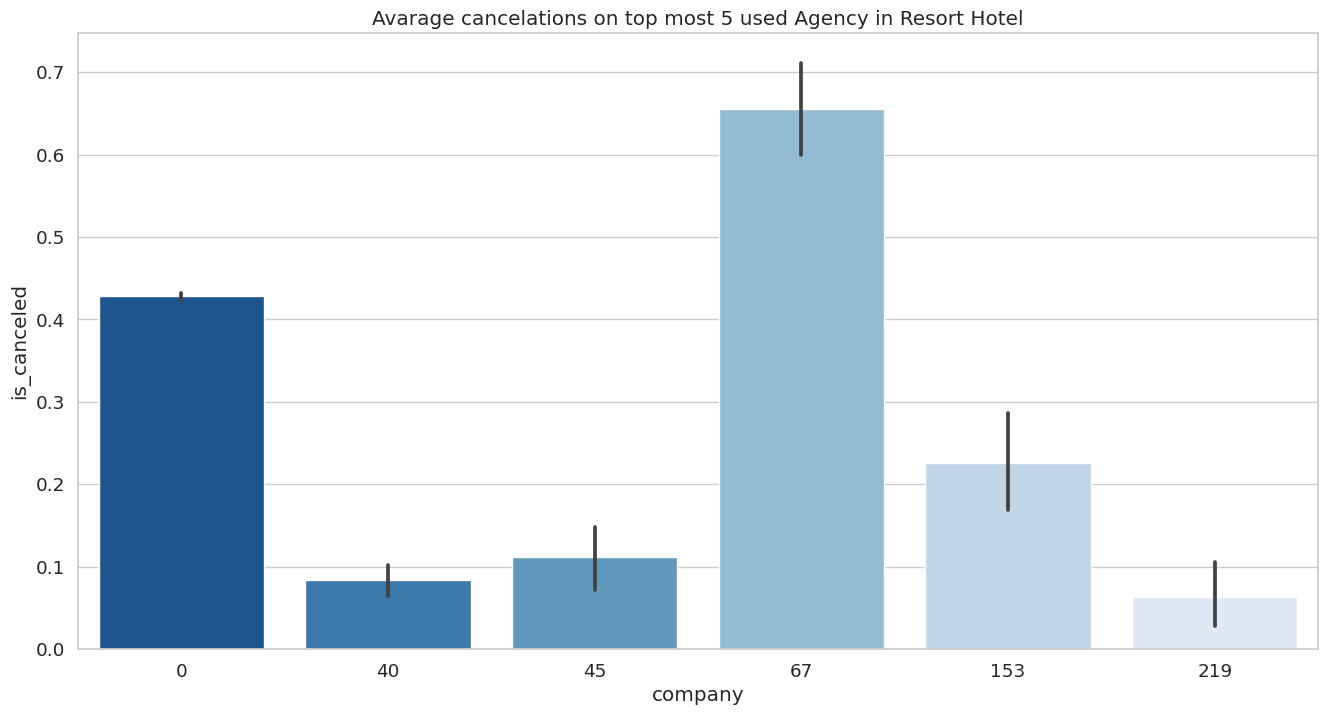

In [164]:
plt.figure(figsize=(16, 8))
plt.title("Avarage cancelations on top most 5 used Agency in Resort Hotel")
sns.barplot(data=ch.loc[ch['company'].isin(top_ch_company)], x="company", y="is_canceled", palette='Blues_r');

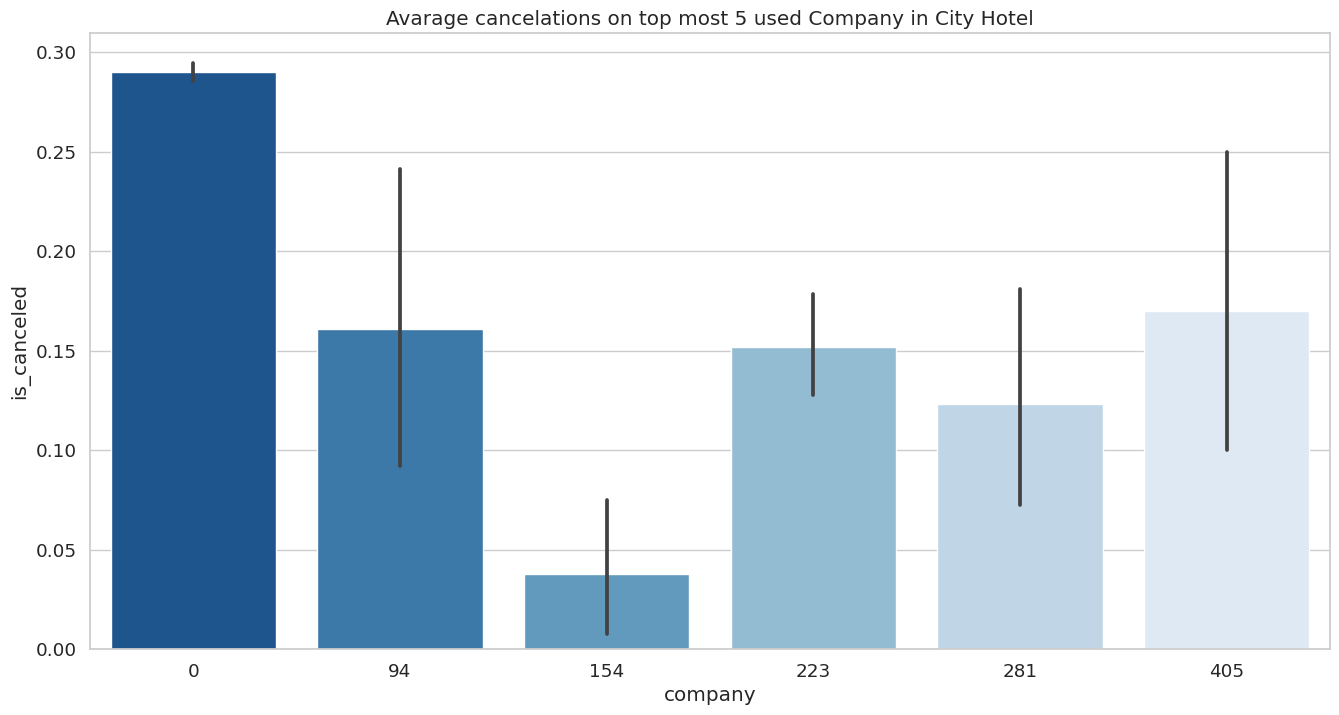

In [165]:
plt.title("Avarage cancelations on top most 5 used Company in City Hotel")
sns.barplot(data=rh.loc[rh['company'].isin(top_rh_company)], x="company", y="is_canceled", palette='Blues_r');

In [166]:
x = data.loc[(data['company']!=0)]
x.market_segment.value_counts()

Corporate        4460
Groups           1389
Complementary     312
Aviation          210
Direct            207
Offline TA/TO     106
Online TA          94
Name: market_segment, dtype: int64

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by repeated guest</p></div>

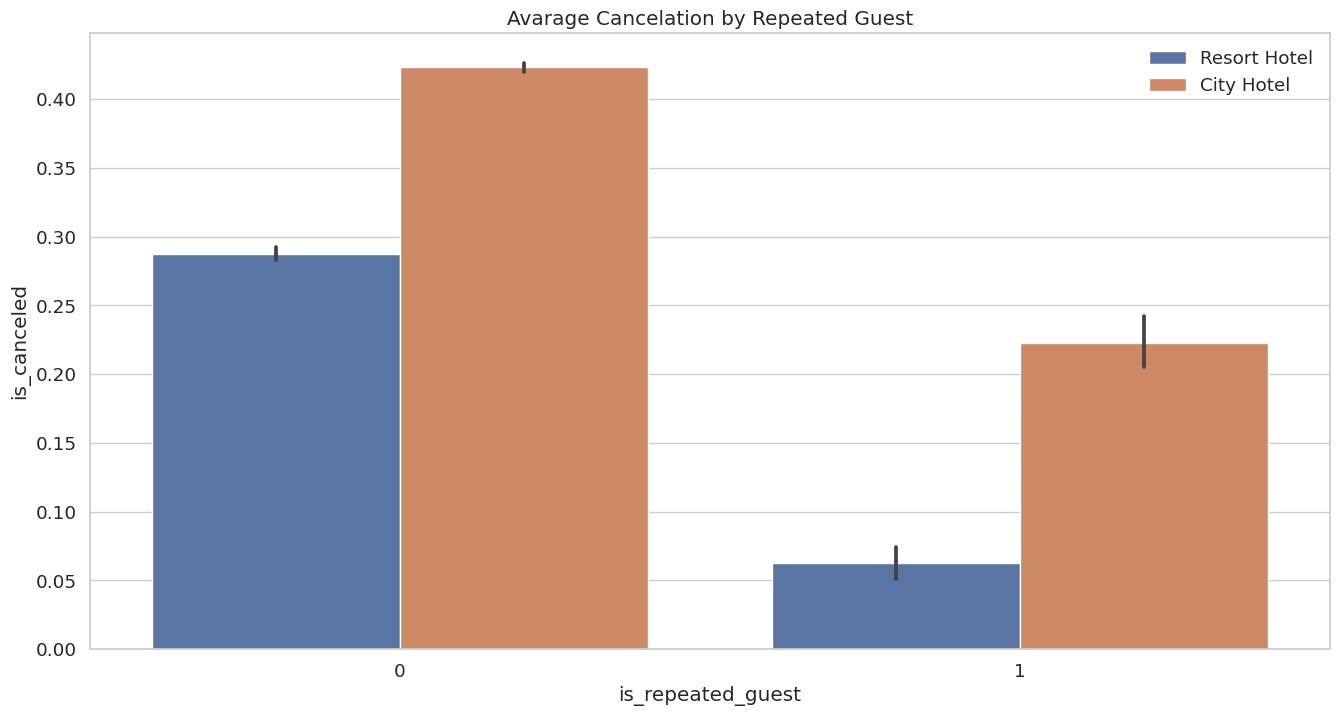

In [167]:
sns.barplot(data=data, x="is_repeated_guest", y='is_canceled', hue="hotel")
plt.title("Avarage Cancelation by Repeated Guest")
plt.legend(ncol=1, loc="best", frameon=False);

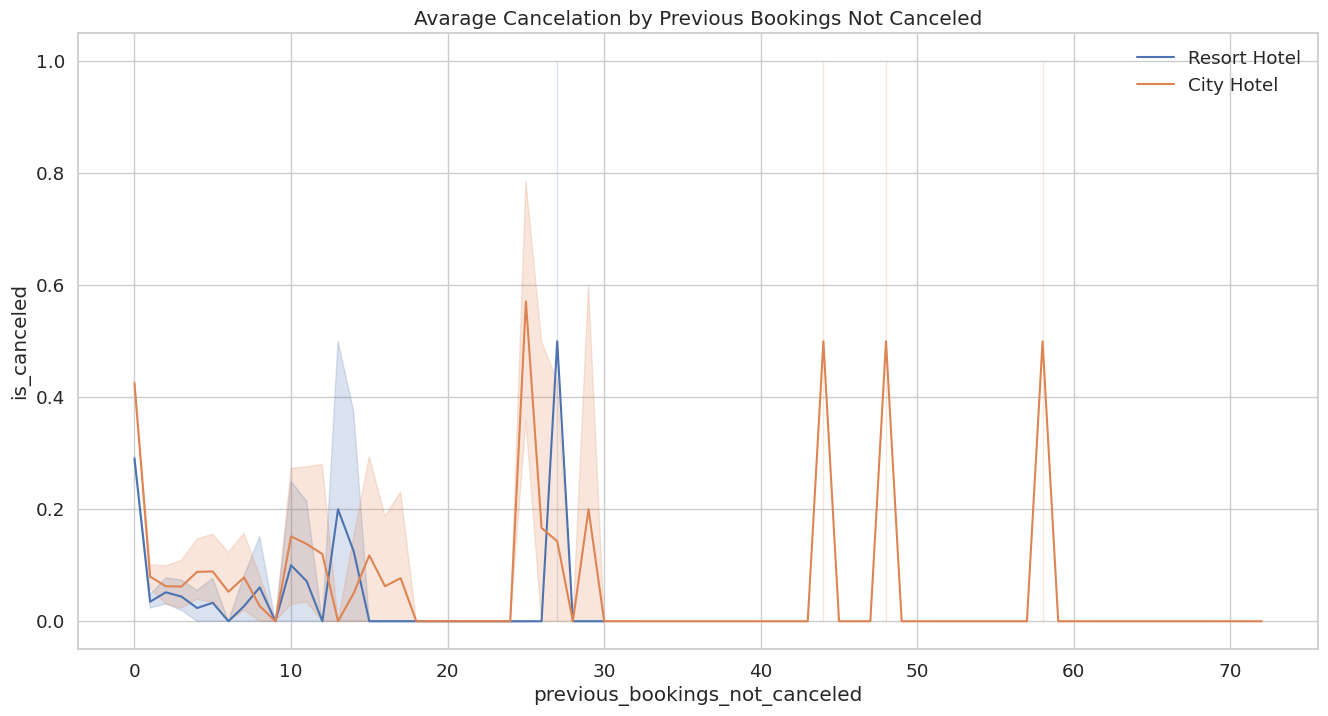

In [169]:
sns.lineplot(data=data, x="previous_bookings_not_canceled", y='is_canceled', hue="hotel")
plt.title("Avarage Cancelation by Previous Bookings Not Canceled")
plt.legend(ncol=1, loc="best", frameon=False);

In [170]:
data.groupby(['previous_bookings_not_canceled','hotel']).agg( reservations = ('previous_bookings_not_canceled', 'size'),
                                                      adr_mean = ('adr', 'mean'),
                                                      adr_sum = ('adr', 'sum'),
                                                      canceled_mean = ('is_canceled', 'mean')).sort_values(by='previous_bookings_not_canceled',ascending=True).reset_index().head(22)

,previous_bookings_not_canceled,hotel,reservations,adr_mean,adr_sum,canceled_mean
0,0,City Hotel,77605,106.180699,8240153.18,0.424986
1,0,Resort Hotel,38017,96.555802,3670761.92,0.290475
2,1,City Hotel,565,81.382248,45980.97,0.079646
3,1,Resort Hotel,973,70.445159,68543.14,0.034943
4,2,City Hotel,192,74.789635,14359.61,0.062500
5,2,Resort Hotel,387,65.650517,25406.75,0.051680
6,3,City Hotel,129,63.908837,8244.24,0.062016
7,3,Resort Hotel,204,60.505441,12343.11,0.044118
8,4,City Hotel,102,68.200490,6956.45,0.088235
9,4,Resort Hotel,127,63.471654,8060.90,0.023622


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Market Segment</p></div>

In [175]:
market_cancel_ch = ch.groupby(['market_segment']).agg( reservations = ('arrival_date_month', 'size'),
                                   adr_mean = ('adr', 'mean'),
                                   days_stay_mean = ('days_stay', 'mean'),                             
                                   people_mean = ('people', 'mean'),
                                   canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

market_cancel_ch.style.background_gradient(cmap='Blues')

,market_segment,reservations,adr_mean,days_stay_mean,people_mean,canceled_mean
0,Online TA,38683,119.086694,3.277745,2.121190,0.374609
1,Offline TA/TO,16719,93.160229,2.905497,1.801364,0.429033
2,Groups,13962,85.000713,2.545409,1.798453,0.689228
3,Direct,6072,119.833712,2.870553,2.044466,0.173913
4,Corporate,2978,83.340920,1.875756,1.238751,0.215245
5,Complementary,535,2.634449,1.472897,1.590654,0.119626
6,Aviation,235,100.994383,3.638298,1.012766,0.221277
7,Undefined,2,15.000000,1.500000,2.500000,1.000000


In [174]:
market_cancel_rh = rh.groupby(['market_segment']).agg( reservations = ('arrival_date_month', 'size'),
                                   adr_mean = ('adr', 'mean'),
                                   days_stay_mean = ('days_stay', 'mean'),                             
                                   people_mean = ('people', 'mean'),
                                   canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

market_cancel_rh.style.background_gradient(cmap='Blues')

,market_segment,reservations,adr_mean,days_stay_mean,people_mean,canceled_mean
0,Online TA,17729,113.432480,4.213266,2.151729,0.352417
1,Offline TA/TO,7472,74.662571,6.142398,1.977248,0.152302
2,Direct,6510,111.718000,3.509524,2.114900,0.134869
3,Groups,5831,66.505035,4.060539,1.810496,0.424284
4,Corporate,2305,51.652664,2.333623,1.268980,0.152278
5,Complementary,201,3.657413,2.149254,1.671642,0.164179


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Customer Type</p></div>

In [180]:
customer_cancel_ch = ch.groupby(['customer_type']).agg( reservations = ('customer_type', 'size'),
                                     adr_mean = ('adr', 'mean'),
                                     days_stay_mean = ('days_stay', 'mean'),                             
                                     people_mean = ('people', 'mean'),
                                     canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

customer_cancel_ch.style.background_gradient(cmap='Oranges')

,customer_type,reservations,adr_mean,days_stay_mean,people_mean,canceled_mean
0,Transient,59291,110.198856,3.074784,2.010575,0.457034
1,Transient-Party,17308,90.991936,2.661197,1.742085,0.281373
2,Contract,2296,94.218807,2.820122,1.995645,0.481272
3,Group,291,92.556357,2.505155,1.838488,0.099656


In [182]:
customer_cancel_rh = rh.groupby(['customer_type']).agg( reservations = ('customer_type', 'size'),
                                     adr_mean = ('adr', 'mean'),
                                     days_stay_mean = ('days_stay', 'mean'),                             
                                     people_mean = ('people', 'mean'),
                                     canceled_mean = ('is_canceled', 'mean')).sort_values(by='reservations',ascending=False).reset_index()

customer_cancel_rh.style.background_gradient(cmap='Oranges')

,customer_type,reservations,adr_mean,days_stay_mean,people_mean,canceled_mean
0,Transient,30205,101.120710,4.175070,2.052044,0.311736
1,Transient-Party,7783,75.508562,3.944623,1.814596,0.195169
2,Contract,1776,79.124966,8.563063,1.993806,0.088401
3,Group,284,74.762711,3.207746,3.035211,0.105634


### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Cancelations by Deposit Type</p></div>

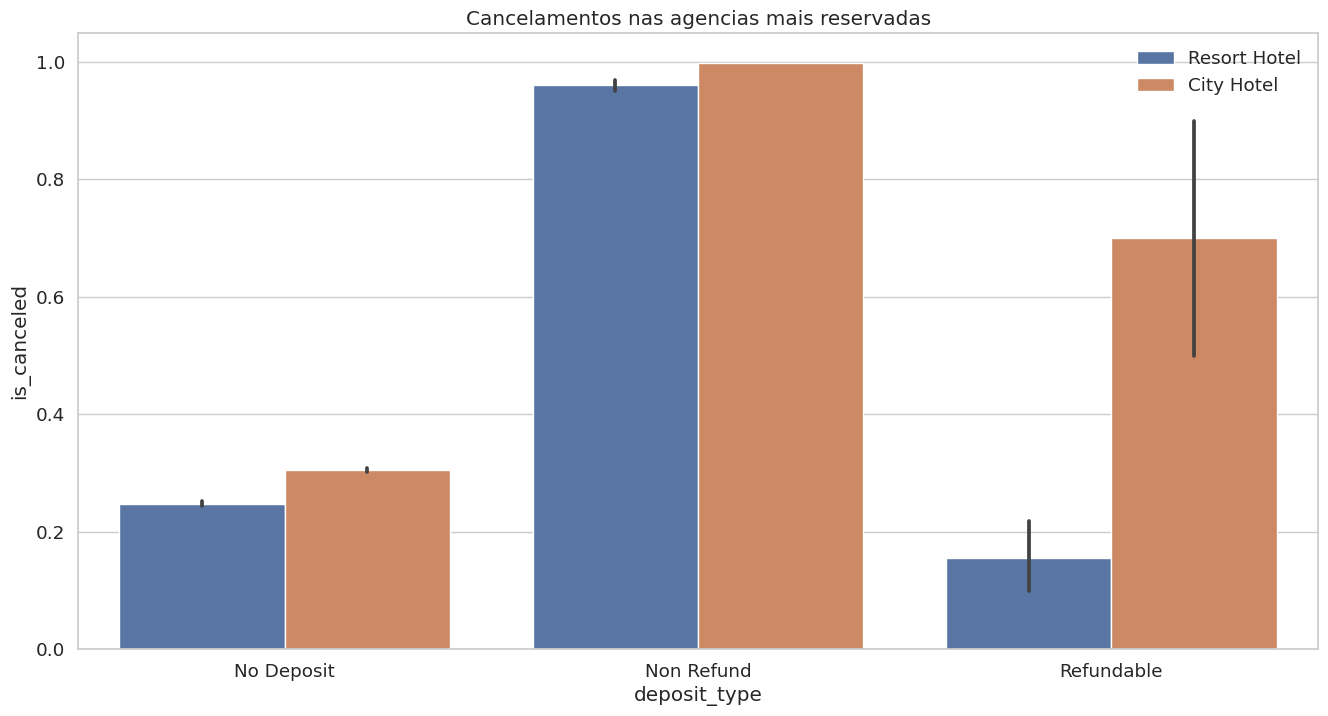

In [183]:
sns.barplot(data=data, x="deposit_type", y="is_canceled", hue="hotel")
plt.title("Cancelamentos nas agencias mais reservadas")
plt.legend(ncol=1, loc="best", frameon=False);

In [184]:
data.deposit_type.value_counts()

No Deposit    104485
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

**OBS:** Probably this feature has wrong values. No Refund with such high cancellation rate is quite counterintuitive.

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Non Canceled</p></div>

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Days Stay</p></div>

In [185]:
data_ncanceled = data.loc[(data["is_canceled"] == 0)]
data_ncanceled = sort_month(data_ncanceled, 'arrival_date_month')

In [186]:
print('Avarage Days Stay City Hotel:',data_ncanceled.days_stay.loc[data_ncanceled['hotel']=='City Hotel'].mean())
print('Avarage Days Stay Resort Hotel:',data_ncanceled.days_stay.loc[data_ncanceled['hotel']=='Resort Hotel'].mean())

Avarage Days Stay City Hotel: 2.9178890721291553
Avarage Days Stay Resort Hotel: 4.142086704003319


**OBS:** False, on avarage people stay 2.91 days on City Hotel and 4.14 days on Resort Hotel.

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">ADR</p></div>

In [187]:
# monthly_adr = data_ncanceled.groupby(['arrival_date_month','hotel']).agg( reservations = ('arrival_date_month', 'size'),
#                                             adr_mean = ('adr', 'mean'),
#                                             days_stay_mean = ('days_stay', 'mean'),                             
#                                             people_mean = ('people', 'mean')).reset_index()

# monthly_adr = sort_month(monthly_adr, 'arrival_date_month')
# monthly_adr

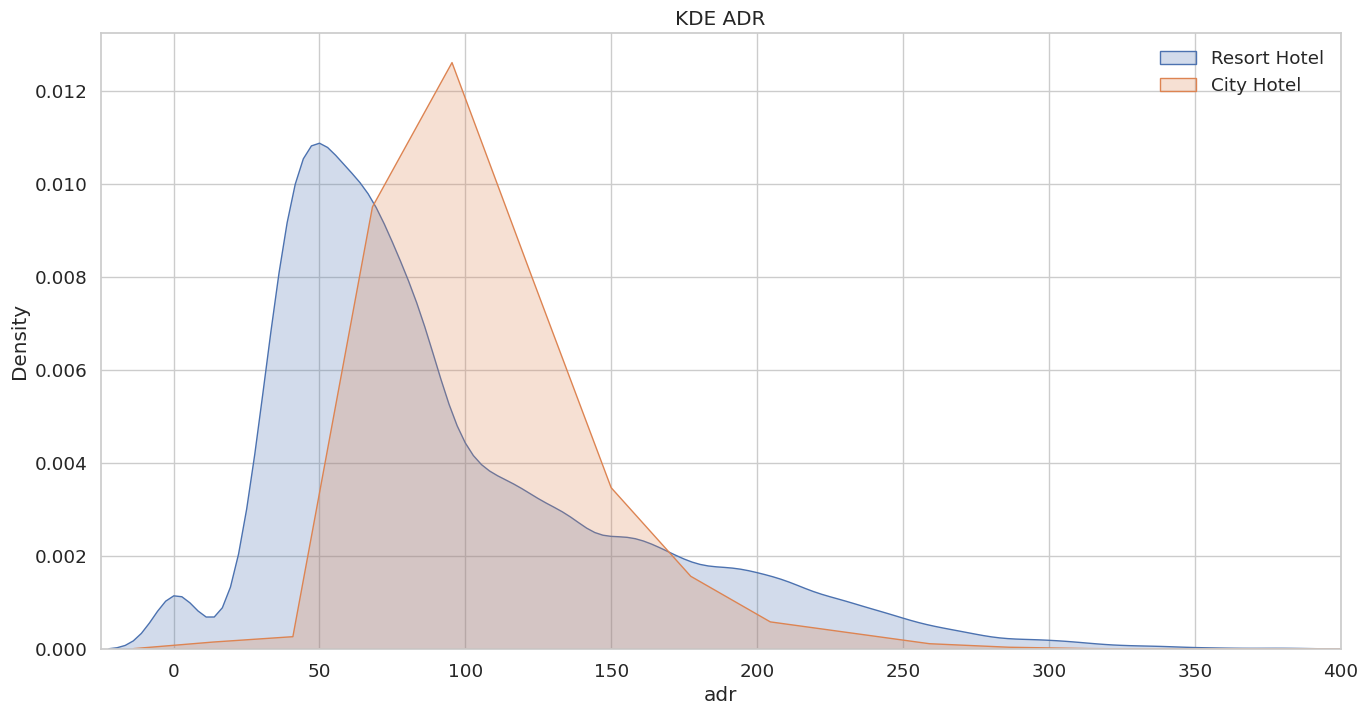

In [188]:
plt.title('KDE ADR')
sns.kdeplot(data=rh, x='adr', fill=True, label='Resort Hotel') 
sns.kdeplot(data=ch, x='adr', fill=True, label='City Hotel') 
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.xlim(-25, 400);

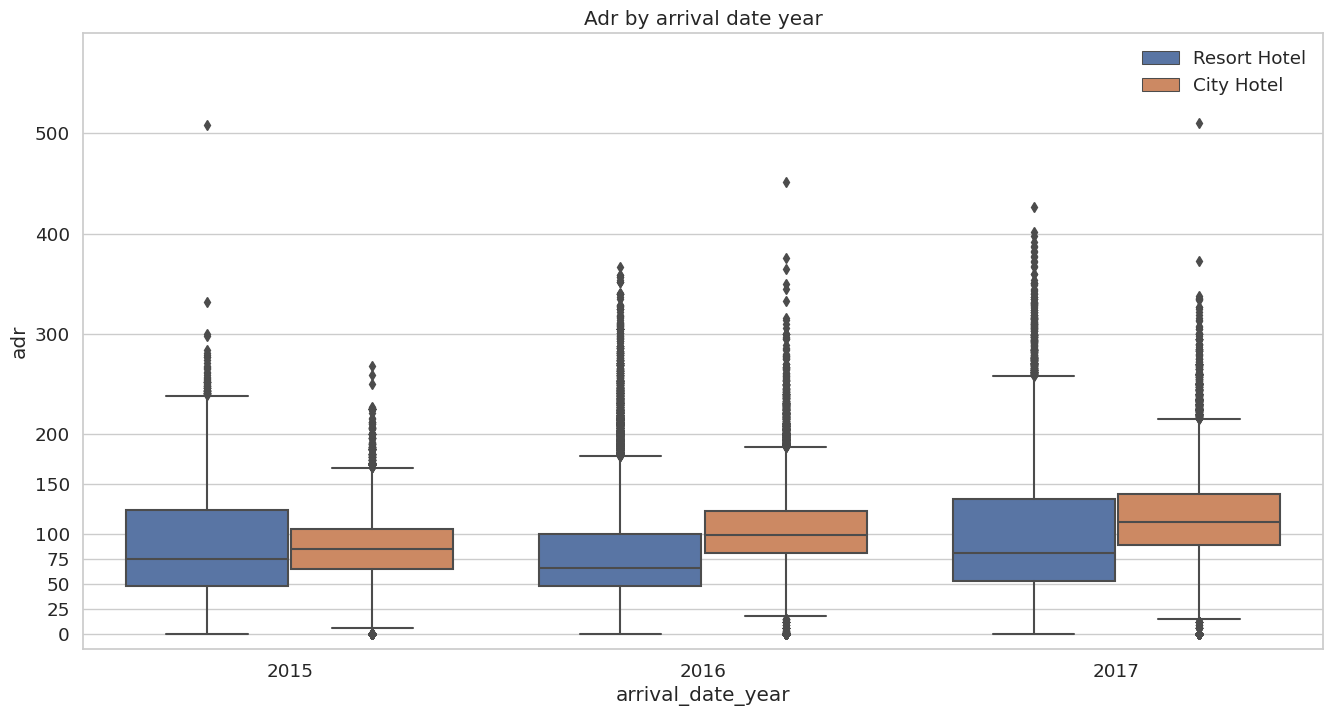

In [189]:
sns.boxplot(data=data_ncanceled, x="arrival_date_year", y="adr", hue="hotel")#, palette= 'rocket'
plt.title("Adr by arrival date year")
plt.yticks([0,25,50,75, 100,150,200,300,400,500])
plt.legend(ncol=1, loc="upper right", frameon=False);
plt.ylim(-15, 600);

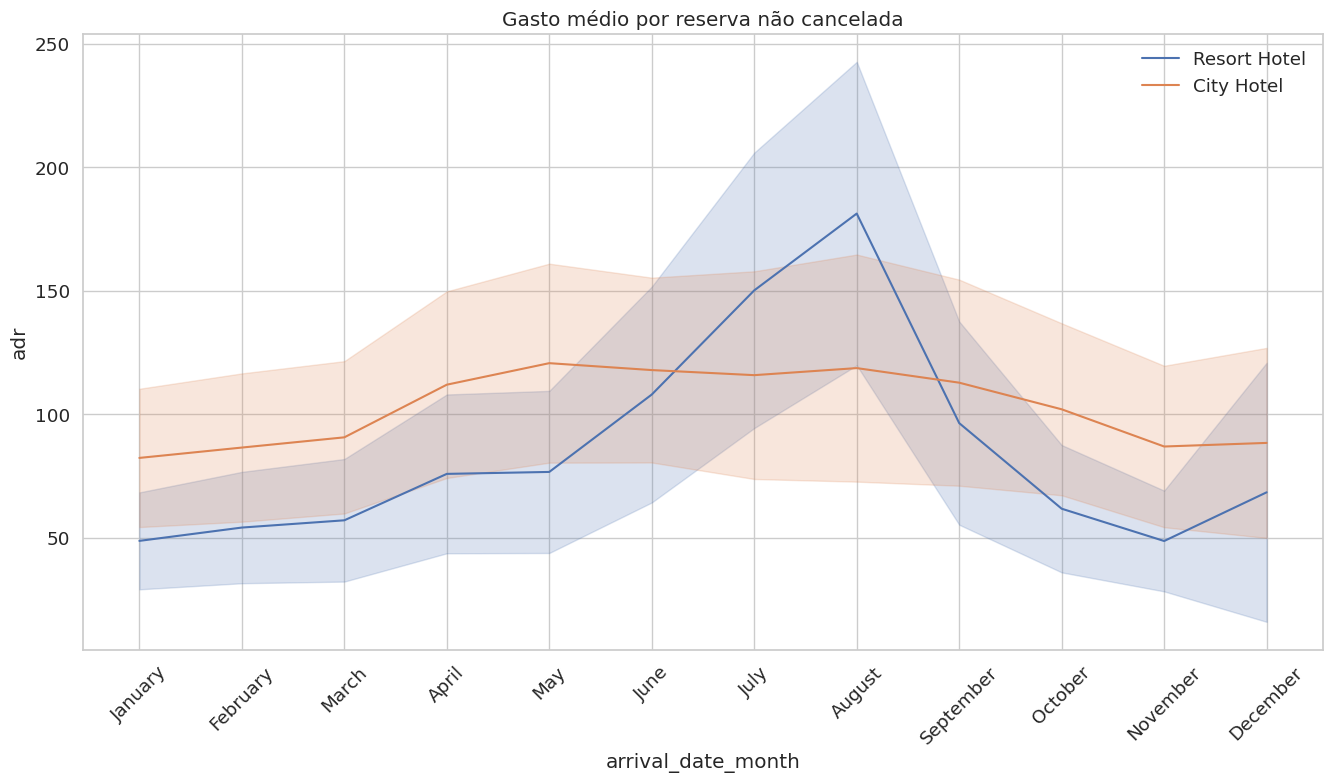

In [190]:
plt.subplots(figsize=(16,8))
sns.lineplot(data=data_ncanceled, x="arrival_date_month", y="adr", hue="hotel", errorbar="sd")
plt.title("Gasto médio por reserva não cancelada")
plt.xticks(rotation=45)
plt.legend(ncol=1, loc="upper right", frameon=False);

**H8:** False, considering that the European high season refers to the months of June, July, August and the low season to the months of November, January, February and March; on average, the cancellation rate for the city hotel was 4% lower in the low season.

## Multivariated Analysis

/tmp/ipykernel_6547/1145486551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(data.corr(), dtype=bool)
/tmp/ipykernel_6547/1145486551.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});


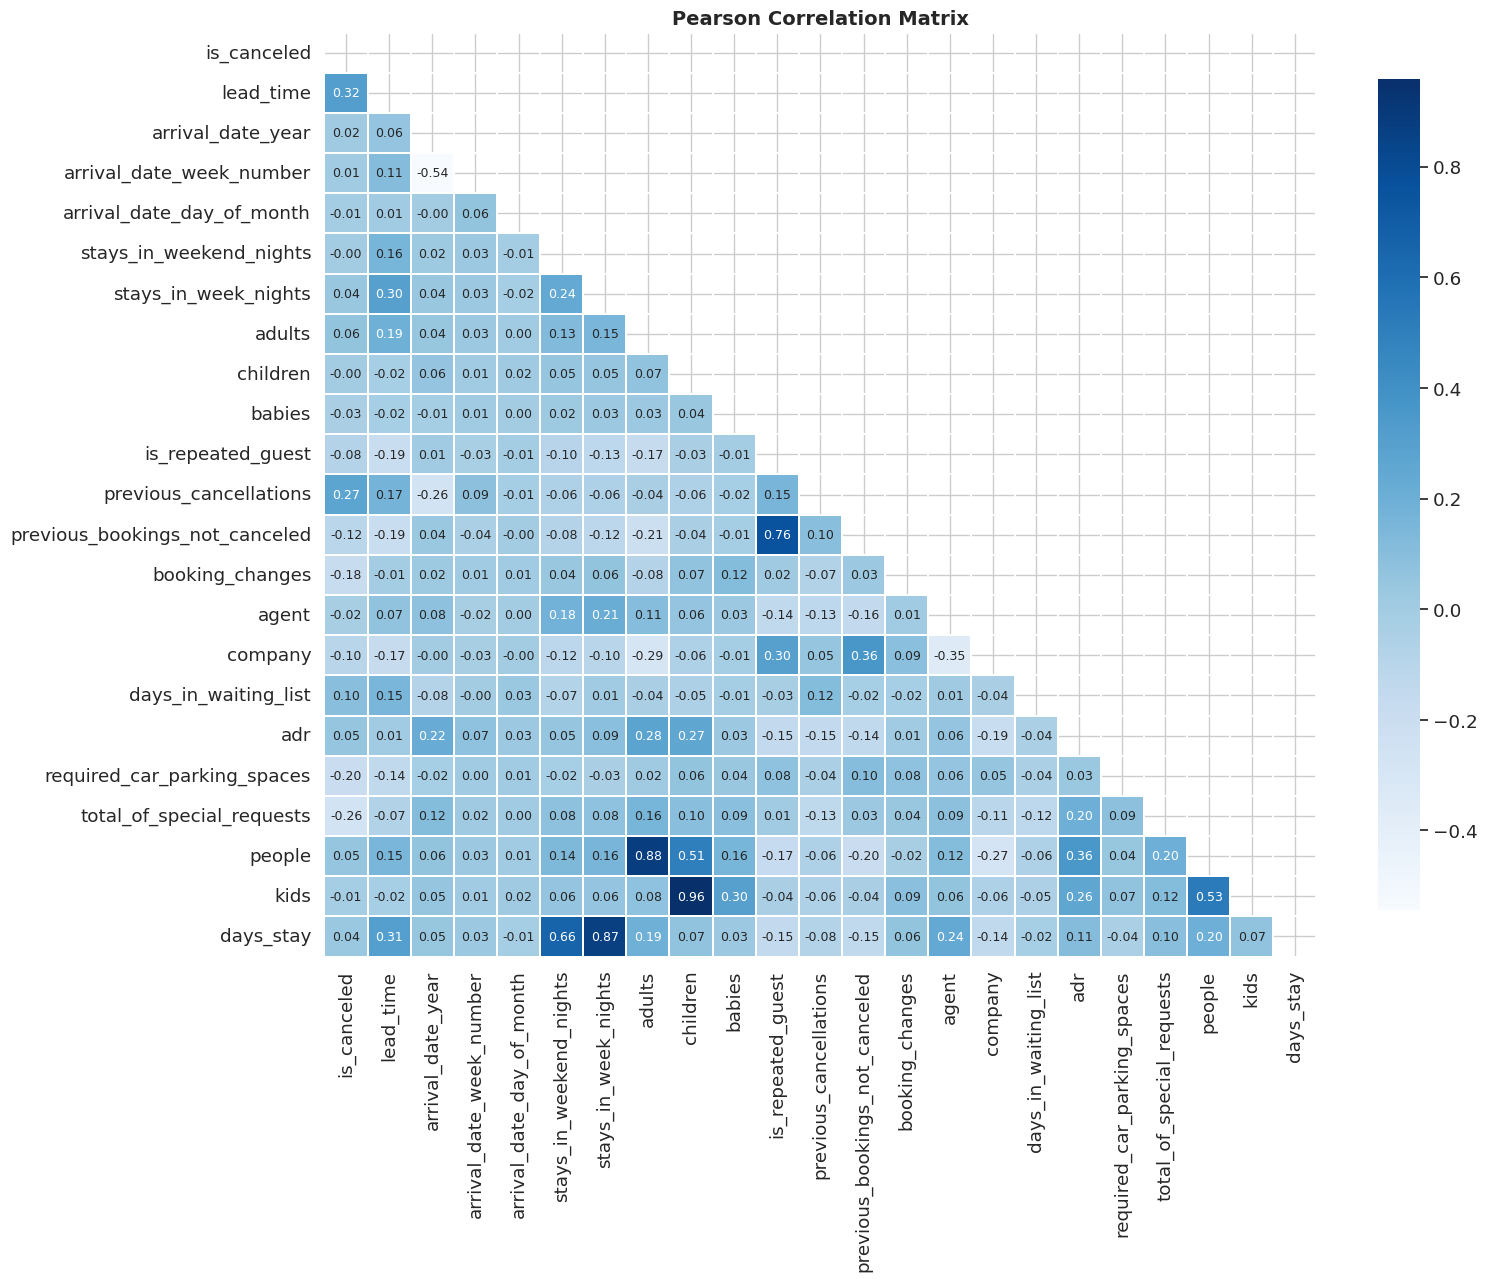

In [191]:
mask = np.zeros_like(data.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Pearson Correlation Matrix',fontsize=14, fontweight='bold')

sns.heatmap(data.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

## <div style="color:white;display:fill;border-radius:5px;background-color:#153656;letter-spacing:0.5px;overflow:hidden"><p style="padding:15px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Insights</p></div>

- O adr médio do Resort Hotel é inferior ao City Hotel, exceto na alta temporada. O que até certo ponto é contra intuítivo.
- Não há registro de cancelamento de reserva quando solicitado de vagas de estacionamento.
- Lead Time elevado não é sinonimo de cancelamento. No Resort Hotel não é tão incomum reservas agendadas a mais de um ano não serem canceladas.
- Taxa de cancelamento entre as principais agencias podem variar bastante. Seria necessário mais dados/informações para investigar os motivos.
- A Taxa de cancelamento no City Hotel é 14% maior que no Resort Hotel.
- Quanto mais requisições especiais são atendidas menor a taxa de cancelamento.